In [1]:
#Import results file and SLEAP predictions file
#Function to know the time at which at a frame was taken relative to the first TTL pulse.


import numpy as np

def load_ttl_and_video_times_absolute(fname_results,
                                      fname_video):
    d = np.load(fname_results, allow_pickle=True)
    
    ttl_times = d['ttl_times']
    vid = np.load(fname_video, allow_pickle=True)
    vid_times = vid['vide_frame_times']
    #print (vid_times)
    vid_times = vid_times[:,1]
    vid_times = vid_times - vid_times[0]+ttl_times[0]
    print ("#ttl times: ", ttl_times.shape)
    print ("#Video times: ", vid_times.shape)
    return ttl_times, vid_times
#
fname_results = r"D:\DON-014371_predicted\20230408\data\results.npz"
fname_video = r"D:\DON-014371_predicted\20230408\data\video_data.npz"
ttl_times, vid_times = load_ttl_and_video_times_absolute(fname_results,
                                                            fname_video)

#ttl times:  (90000,)
#Video times:  (89199,)


In [552]:
print((ttl_times[89999]-ttl_times[0])/90000)

0.033347223493333335


In [553]:
89999+1

90000

In [554]:
print(ttl_times)

[ 117.7317982  117.7657997  117.7978646 ... 3118.9157687 3118.9497057
 3118.9819126]


In [555]:
print(vid_times)

[ 117.7317982   117.77867582  117.81258467 ... 3118.89480093 3118.92970779
 3118.96561053]


In [556]:
difference=abs(ttl_times[2]-vid_times)
idx = np.argmin(difference)
print(idx)

2


In [557]:
#Loop to create a list of indeces that correspond to the nearest frame time for each TTL pulse time.

indexes = []


for n in range(len(ttl_times)):
    abs_difference=abs(ttl_times[n]-vid_times)
    idx = np.argmin(abs_difference)
    indexes.append(idx)


print(indexes[0:10])






[0, 1, 2, 3, 3, 4, 5, 7, 8, 9]


In [558]:
print(len(indexes))


90000


In [559]:
#Since there are less frames than TTL pulses, some frames will be assigned to more than one TTL pulse.

def find_duplicates(lst):
    duplicates = []
    seen = set()
    
    for item in lst:
        if item in seen:
            duplicates.append(item)
        else:
            seen.add(item)
    
    return duplicates

# Example usage

result = find_duplicates(indexes)
print(result)

[3, 19, 23, 28, 32, 35, 44, 54, 59, 80, 86, 144, 185, 220, 234, 236, 253, 283, 295, 300, 323, 329, 333, 351, 386, 415, 463, 512, 531, 536, 540, 560, 563, 570, 581, 583, 586, 598, 601, 620, 625, 638, 674, 679, 686, 699, 709, 728, 735, 737, 737, 763, 789, 844, 898, 913, 929, 982, 1001, 1010, 1048, 1064, 1140, 1168, 1187, 1207, 1262, 1272, 1281, 1283, 1300, 1317, 1329, 1356, 1368, 1380, 1385, 1392, 1412, 1416, 1437, 1441, 1443, 1452, 1498, 1515, 1526, 1549, 1554, 1608, 1620, 1635, 1663, 1675, 1691, 1708, 1717, 1731, 1745, 1766, 1775, 1781, 1790, 1800, 1802, 1811, 1829, 1855, 1872, 1883, 1908, 1911, 1931, 1937, 1963, 1991, 2001, 2098, 2119, 2139, 2169, 2184, 2197, 2205, 2212, 2239, 2266, 2294, 2316, 2320, 2344, 2348, 2373, 2428, 2456, 2477, 2500, 2512, 2539, 2566, 2594, 2615, 2647, 2701, 2704, 2721, 2728, 2740, 2756, 2783, 2789, 2792, 2799, 2802, 2811, 2823, 2825, 2828, 2828, 2833, 2837, 2845, 2857, 2864, 2872, 2894, 2897, 2923, 2925, 2937, 2940, 2955, 2991, 2991, 2994, 3032, 3051, 3054, 3

In [2]:
import h5py
import numpy as np

with h5py.File(r"D:\Salome\Slp_mouse_model\results\labels.v001.mouse.006_Trial     3.analysis.h5", "r") as f:
    dset_names = list(f.keys())
    locations = f["tracks"][:].T
    node_names = [n.decode() for n in f["node_names"][:]]

print("===filename===")
print("D:\train_SLEAP_simple\labels.v001.000_DON011733-20230305.analysis.h5")
print()

print("===HDF5 datasets===")
print(dset_names)
print()

print("===locations data shape===")
print(locations.shape)
print()

print("===nodes===")
for i, name in enumerate(node_names):
    print(f"{i}: {name}")
print()

===filename===
D:	rain_SLEAP_simple\labels.v001.000_DON011733-20230305.analysis.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']

===locations data shape===
(15044, 5, 2, 1)

===nodes===
0: nose
1: head
2: spine1
3: spine2
4: spine3



In [3]:
#For each one of the 89188 frames there is the position of 10 nodes in the two XY coordinates for just 1 animal.


print(locations.shape)

(15044, 5, 2, 1)


In [564]:
#This generates an array in which there is 90000 frames with their relative nodes positions for the 900000 ttl pulses.


behavior_frames = []
for k in range(len(indexes)):
    temp = locations[indexes[k]]
    behavior_frames.append(temp)
behavior_frames = np.array(behavior_frames)
print(behavior_frames.shape)

print(behavior_frames[0:10,:,:,0])

(90000, 10, 2, 1)
[[[ 479.91751099  736.98809814]
  [ 736.09240723  727.59179688]
  [ 583.76202393  592.56054688]
  [ 624.95239258  904.78356934]
  [          nan           nan]
  [1368.84960938  945.6192627 ]
  [ 825.10913086  616.14477539]
  [1048.75585938  672.01123047]
  [ 376.82171631  680.05554199]
  [          nan           nan]]

 [[ 480.53704834  744.37298584]
  [ 752.38800049  713.19995117]
  [ 577.39141846  592.53094482]
  [ 712.28424072  887.97729492]
  [ 561.04418945  799.60058594]
  [1416.15625     960.00085449]
  [ 832.74700928  609.47375488]
  [1048.54992676  665.2767334 ]
  [ 376.66796875  679.91113281]
  [          nan           nan]]

 [[ 480.51846313  744.44354248]
  [ 760.2310791   712.99993896]
  [ 583.63891602  592.6864624 ]
  [ 752.54260254  880.57214355]
  [ 514.0213623   794.54321289]
  [1169.56445312  807.99688721]
  [ 833.24645996  609.35388184]
  [1041.30358887  664.46105957]
  [ 376.66320801  680.12084961]
  [          nan           nan]]

 [[ 480.9675293 

In [565]:
#Obtain information about the reward state associated with each TTL pulse.
import pandas as pd
rewards = pd.read_excel(r"D:\DON-014371_predicted\20230408\data\results.xlsx")
rewards = np.array(rewards)
rewards=rewards[:,8]
rewards[rewards>0.5]=1
rewards[rewards<0.5]=0
print(len(rewards))
print(rewards[0:10])

90000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [566]:
#Number of TTL pulses with Reward ON state.

np.count_nonzero(rewards)

3273

In [567]:
#Extract the indices of the first TTL pulse corresponding for a reward, for each reward.

def extract_reward_indices(n):
    reward_indices = []
    for i in range(len(n)):
        if n[i] == 1 and n[i - 1] == 0:
            reward_indices.append(i)
    return reward_indices

# Example usage:
reward_indices=extract_reward_indices(rewards)
print(reward_indices)

[1679, 2204, 2911, 3058, 3191, 3779, 4171, 4374, 8525, 9575, 11878, 15154, 15483, 15882, 16127, 16792, 19907, 20180, 20341, 20852, 23561, 24429, 26781, 26984, 27292, 28993, 29406, 34880, 35097, 38464, 41803, 43231, 45086, 46766, 47032, 47921, 52779, 58211, 66114, 70832, 71273, 72106, 76474, 83873, 88850, 89158]


## TONGUE_INDEX = 9
LEFTHAND_INDEX =3

tongue_loc = locations[:, TONGUE_INDEX, :, :]
lefthand_loc = locations[:, LEFTHAND_INDEX, :, :]

import sleap
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set('notebook', 'ticks', font_scale=1.2)
mpl.rcParams['figure.figsize'] = [15,6]

plt.figure()
plt.plot(lefthand_loc[:,0,0], 'y')

plt.plot(-1*lefthand_loc[:,1,0], 'y')

plt.legend(loc="center right")
plt.title('Tonge locations')


plt.figure(figsize=(7,7))
plt.plot(tongue_loc[:,0,0],tongue_loc[:,1,0], 'y',label='fly-0')
plt.legend()

plt.xlim(0,1024)
plt.xticks([])

plt.ylim(0,2000)
plt.yticks([])
plt.title('Left hand tracks')



In [568]:
TONGUE_INDEX = 9
LEFTHAND_INDEX =3
LEFTFOOT_INDEX=5
NOSE_INDEX=8
EAR_INDEX=6
RIGHTHAND_INDEX=4
MOUTH_INDEX=0

tongue_loc = locations[:, TONGUE_INDEX, :, :]
lefthand_loc = behavior_frames[:, LEFTHAND_INDEX, :, :]



print(tongue_loc[1:10])
print(lefthand_loc[1:10])

[[[         nan]
  [         nan]]

 [[         nan]
  [         nan]]

 [[424.77438354]
  [809.22119141]]

 [[424.77438354]
  [809.22119141]]

 [[         nan]
  [         nan]]

 [[         nan]
  [         nan]]

 [[         nan]
  [         nan]]

 [[         nan]
  [         nan]]

 [[         nan]
  [         nan]]]
[[[712.28424072]
  [887.97729492]]

 [[752.54260254]
  [880.57214355]]

 [[775.70294189]
  [880.15869141]]

 [[775.70294189]
  [880.15869141]]

 [[792.03851318]
  [872.87963867]]

 [[865.10137939]
  [864.75378418]]

 [[935.54748535]
  [865.3260498 ]]

 [[927.79638672]
  [865.22277832]]

 [[904.42803955]
  [865.18609619]]]


In [5]:
HEAD_INDEX = 1
head_loc = locations[:, HEAD_INDEX, :, :]

In [569]:
nose_loc = behavior_frames[:, NOSE_INDEX, :, :]
mouth_loc = behavior_frames[:, MOUTH_INDEX, :, :]
ear_loc = behavior_frames[:, EAR_INDEX, :, :]
leftfoot_loc = behavior_frames[:, LEFTFOOT_INDEX, :, :]
righthand_loc = behavior_frames[:, RIGHTHAND_INDEX, :, :]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Head locations')

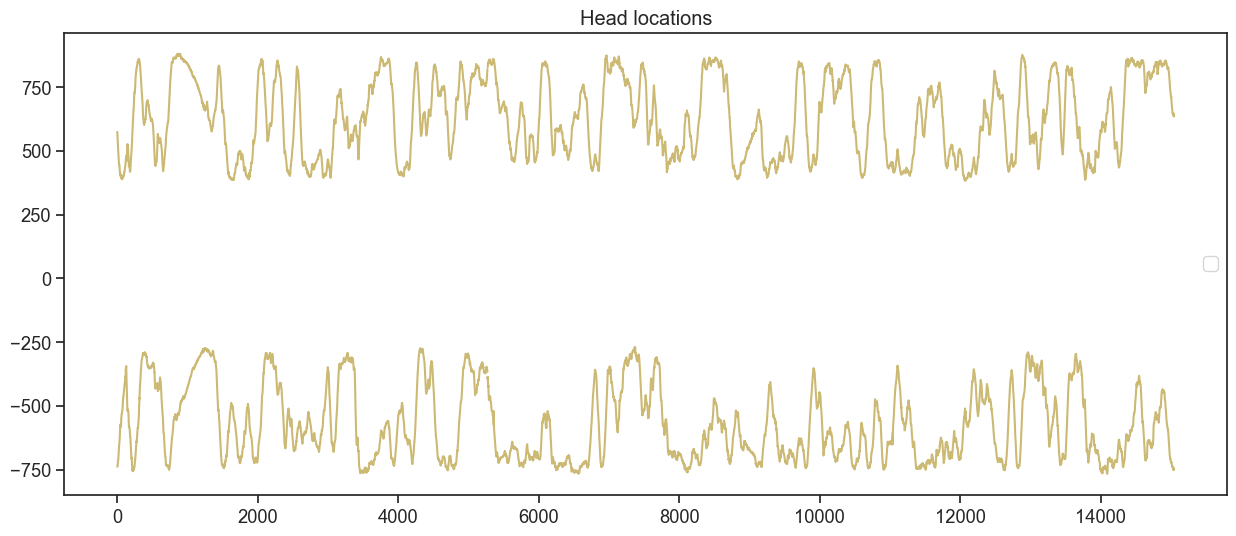

In [7]:

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set('notebook', 'ticks', font_scale=1.2)
mpl.rcParams['figure.figsize'] = [15,6]

plt.figure()
plt.plot(head_loc[:,0,0], 'y')

plt.plot(-1*head_loc[:,1,0], 'y')

plt.legend(loc="center right")
plt.title('Head locations')

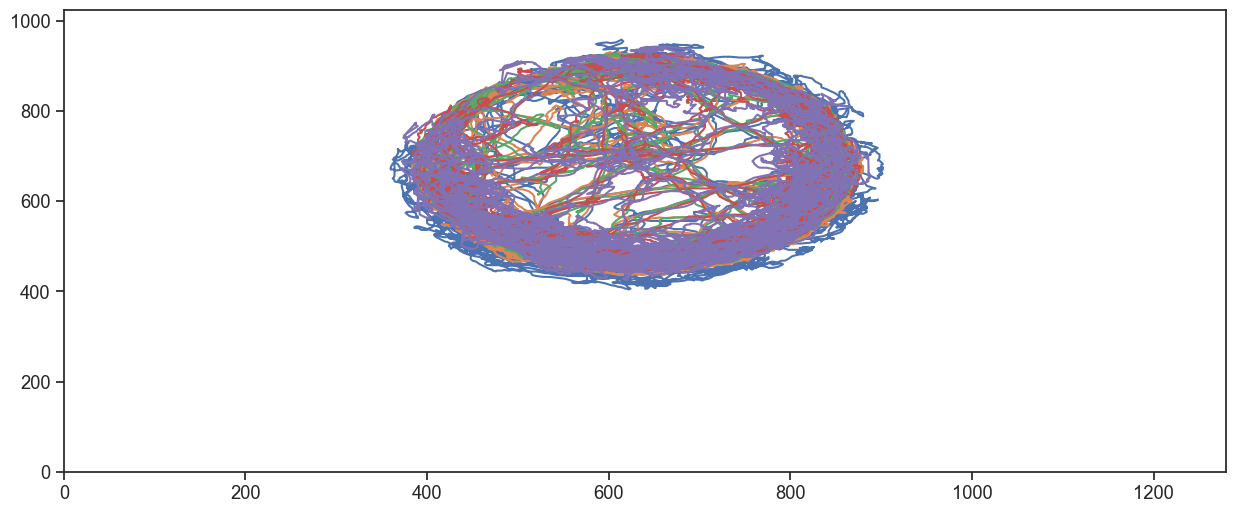

In [10]:
locations.shape
plt.figure()
# plot each body part
for k in range(5):
	#
	loc = locations[:,k,:,0]
	
	# bp has dimensions: (90000,2)
	plt.plot(loc[:,0],
			 1200-loc[:,1],
			 )
			 

plt.gray()        
plt.xlim(0, 1280)
plt.ylim(0, 1024)
plt.show()

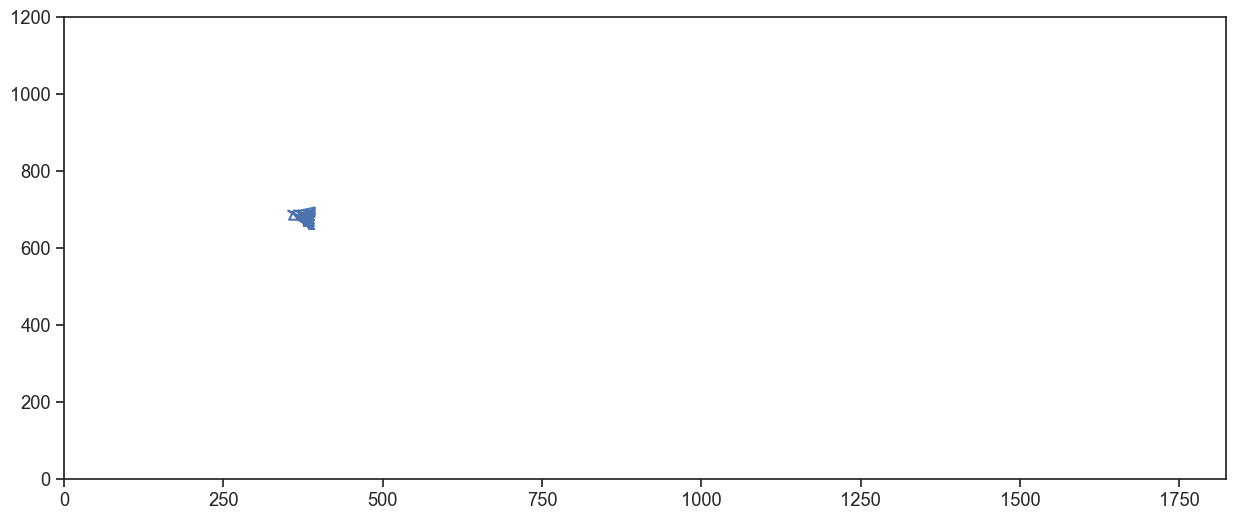

In [572]:
bp = behavior_frames[:,8,:,0]


plt.plot(bp[:,0],
			 bp[:,1],
			 )
			 

plt.gray()        
plt.xlim(0, 1824)
plt.ylim(0, 1200)
plt.show()

Text(0.5, 1.0, 'Left hand tracks')

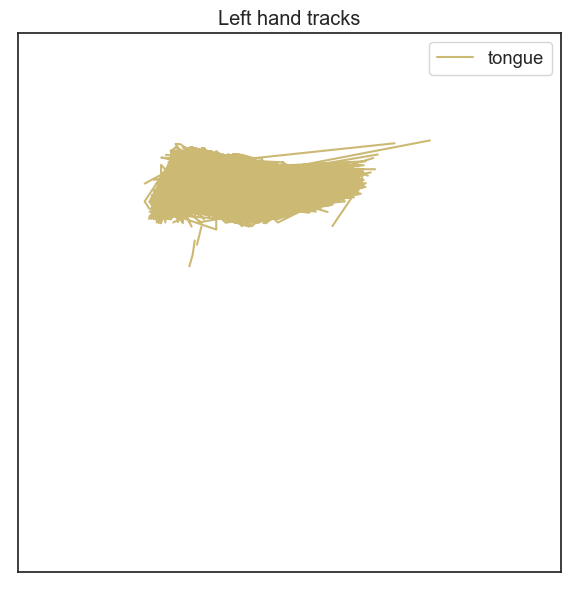

In [573]:
plt.figure(figsize=(7,7))
plt.plot(lefthand_loc[:,0,0],lefthand_loc[:,1,0], 'y',label='tongue')

plt.legend()

plt.xticks([])
plt.xlim(0,1824)
plt.xticks([])

plt.ylim(0,1200)
plt.yticks([])
plt.yticks([])
plt.title('Left hand tracks')

In [574]:
#Compute velocity


from scipy.signal import savgol_filter

def smooth_diff(node_loc, win=25, poly=3):
    """
    node_loc is a [frames, 2] array
    
    win defines the window to smooth over
    
    poly defines the order of the polynomial
    to fit with
    
    """
    node_loc_vel = np.zeros_like(node_loc)
    
    for c in range(node_loc.shape[-1]):
        node_loc_vel[:, c] = savgol_filter(node_loc[:, c], win, poly, deriv=1)
    
    node_vel = np.linalg.norm(node_loc_vel,axis=1)

    return node_vel

velocity=smooth_diff(lefthand_loc[:,:,0])

vel_lefthand = lefthand_loc[1:,:] - lefthand_loc[:-1,:]

print(vel_lefthand[0:3])

[[[ 87.33184814]
  [-16.80627441]]

 [[ 40.25836182]
  [ -7.40515137]]

 [[ 23.16033936]
  [ -0.41345215]]]


In [575]:
vel_nose = nose_loc[1:,:] - nose_loc[:-1,:]

v1_nose=vel_nose[:,0,:]
v1_nose=v1_nose.flatten()


v2_nose=vel_nose[:,1,:]
v2_nose=v2_nose.flatten()


v_all_nose=(v1_nose**2)+(v2_nose**2)


vel_comp_nose=np.sqrt(v_all_nose)




#############################



vel_mouth = mouth_loc[1:,:] - mouth_loc[:-1,:]

v1_mouth=vel_mouth[:,0,:]
v1_mouth=v1_mouth.flatten()


v2_mouth=vel_mouth[:,1,:]
v2_mouth=v2_mouth.flatten()


v_all_mouth=(v1_mouth**2)+(v2_mouth**2)


vel_comp_mouth=np.sqrt(v_all_mouth)




###############################


vel_ear = ear_loc[1:,:] - ear_loc[:-1,:]

v1_ear=vel_ear[:,0,:]
v1_ear=v1_ear.flatten()


v2_ear=vel_ear[:,1,:]
v2_ear=v2_ear.flatten()


v_all_ear=(v1_ear**2)+(v2_ear**2)


vel_comp_ear=np.sqrt(v_all_ear)



###############################


vel_leftfoot = leftfoot_loc[1:,:] - leftfoot_loc[:-1,:]

v1_leftfoot=vel_leftfoot[:,0,:]
v1_leftfoot=v1_leftfoot.flatten()


v2_leftfoot=vel_leftfoot[:,1,:]
v2_leftfoot=v2_leftfoot.flatten()


v_all_leftfoot=(v1_leftfoot**2)+(v2_leftfoot**2)


vel_comp_leftfoot=np.sqrt(v_all_leftfoot)




################################



vel_righthand = righthand_loc[1:,:] - righthand_loc[:-1,:]

v1_righthand=vel_righthand[:,0,:]
v1_righthand=v1_righthand.flatten()


v2_righthand=vel_righthand[:,1,:]
v2_righthand=v2_righthand.flatten()


v_all_righthand=(v1_righthand**2)+(v2_righthand**2)


vel_comp_righthand=np.sqrt(v_all_righthand)




###################################



vel_tongue = tongue_loc[1:,:] - tongue_loc[:-1,:]

v1_tongue=vel_tongue[:,0,:]
v1_tongue=v1_tongue.flatten()


v2_tongue=vel_tongue[:,1,:]
v2_tongue=v2_tongue.flatten()


v_all_tongue=(v1_tongue**2)+(v2_tongue**2)


vel_comp_tongue=np.sqrt(v_all_tongue)








In [576]:
print(vel_comp_righthand.size)

89999


In [577]:
v1=vel_lefthand[:,0,:]
v1=v1.flatten()
print(v1.shape)

v2=vel_lefthand[:,1,:]
v2=v2.flatten()
print(v2.shape)

v_all=(v1**2)+(v2**2)
print(v_all.shape)

vel_comp_lefthand=np.sqrt(v_all)


(89999,)
(89999,)
(89999,)


In [578]:
len(vel_lefthand)

89999

In [579]:
print(velocity[0:10])

[nan nan nan nan nan nan nan nan nan nan]


In [580]:
print(vel_lefthand.shape)

(89999, 2, 1)


In [581]:
print(velocity.shape)

velocity=np.nan_to_num(velocity, nan=0)

(90000,)


In [582]:
event_arrays = []

for i in reward_indices:
    lower_bound = i - 750
    upper_bound = i + 750
    event_array = velocity[lower_bound:upper_bound]
    event_arrays.append(event_array)

print(len(event_arrays))


46


In [583]:
event_arrays_5s = []

for i in reward_indices:
    lower_bound = i - 150
    upper_bound = i + 150
    event_array = vel_comp_lefthand[lower_bound:upper_bound]
    event_arrays_5s.append(event_array)
    

    





In [584]:
event_arrays_5s = [np.nan_to_num(arr, nan=0) for arr in event_arrays_5s]

In [585]:
event_arrays_5s_ear = []

for i in reward_indices[1:]:
    lower_bound = i - 150
    upper_bound = i + 150
    event_array = vel_comp_ear[lower_bound:upper_bound]
    event_arrays_5s_ear.append(event_array)
    

event_arrays_5s_ear=np.nan_to_num(event_arrays_5s_ear, nan=0) 


#######


event_arrays_5s_mouth = []

for i in reward_indices[1:]:
    lower_bound = i - 150
    upper_bound = i + 150
    event_array = vel_comp_mouth[lower_bound:upper_bound]
    event_arrays_5s_mouth.append(event_array)
    

event_arrays_5s_mouth=np.nan_to_num(event_arrays_5s_mouth, nan=0) 


###########


event_arrays_5s_nose = []

for i in reward_indices[1:]:
    lower_bound = i - 150
    upper_bound = i + 150
    event_array = vel_comp_nose[lower_bound:upper_bound]
    event_arrays_5s_nose.append(event_array)
    

event_arrays_5s_nose=np.nan_to_num(event_arrays_5s_nose, nan=0) 


###############


event_arrays_5s_righthand = []

for i in reward_indices[1:]:
    lower_bound = i - 150
    upper_bound = i + 150
    event_array = vel_comp_righthand[lower_bound:upper_bound]
    event_arrays_5s_righthand.append(event_array)
    

event_arrays_5s_righthand=np.nan_to_num(event_arrays_5s_righthand, nan=0) 




###############


event_arrays_5s_leftfoot = []

for i in reward_indices[1:]:
    lower_bound = i - 150
    upper_bound = i + 150
    event_array = vel_comp_leftfoot[lower_bound:upper_bound]
    event_arrays_5s_leftfoot.append(event_array)
    

event_arrays_5s_leftfoot=np.nan_to_num(event_arrays_5s_leftfoot, nan=0) 




#################


event_arrays_5s_tongue = []

for i in reward_indices[1:]:
    lower_bound = i - 150
    upper_bound = i + 150
    event_array = vel_comp_tongue[lower_bound:upper_bound]
    event_arrays_5s_tongue.append(event_array)
    

event_arrays_5s_tongue=np.nan_to_num(event_arrays_5s_tongue, nan=0) 

In [586]:
print(event_arrays_5s[1:2])

[array([8.63134872e-02, 4.09549992e-02, 9.75738368e-02, 3.64698210e-02,
       4.12197031e-02, 3.49607329e-02, 4.89019218e-02, 1.06434340e-01,
       1.32637413e-02, 4.10777484e-02, 6.59017190e-02, 3.88484814e-02,
       5.00058245e-02, 3.91676441e-02, 7.55247849e-02, 2.10004403e-02,
       3.82238970e-02, 4.98373635e-02, 1.85555910e-02, 1.25298992e-01,
       1.13141632e-01, 7.49321084e-02, 8.40732193e-02, 2.19526412e-02,
       6.47277760e-02, 2.33952619e-02, 2.03824526e-02, 2.10676526e-02,
       1.31030938e-01, 2.77142626e-02, 7.38651990e-02, 5.42878466e-02,
       3.12053839e-02, 2.45665556e-02, 4.78727333e-02, 9.29679237e-02,
       2.08409812e-02, 5.15617038e-02, 9.01342960e-02, 1.33735256e-02,
       2.49994665e-02, 4.29269848e-02, 1.56976276e-01, 2.86499440e-02,
       1.34974663e-02, 8.65230121e-02, 2.16414174e-02, 6.57478681e-02,
       2.75550579e-02, 0.00000000e+00, 1.69508596e-02, 2.84804061e-02,
       1.43951128e-02, 3.85991752e-02, 3.03093482e-02, 8.21144046e-03,
     

In [587]:
position_arrays = []

for i in reward_indices:
    lower_bound = i - 150
    upper_bound = i + 150
    event_array = lefthand_loc[lower_bound:upper_bound,:]
    position_arrays.append(event_array)
    

print(lefthand_loc.shape)
print(len(reward_indices))



(90000, 2, 1)
46


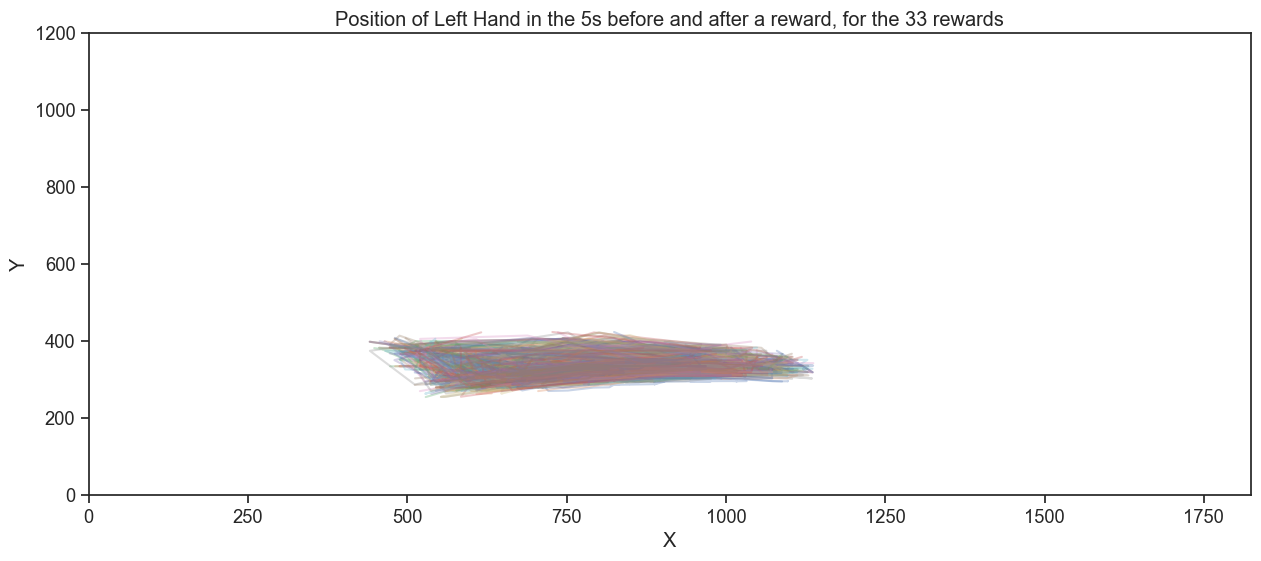

In [588]:
for i, array in enumerate(position_arrays):
    x_coords = array[:, 0]
    y_coords = 1200-array[:, 1]
    plt.plot(x_coords, y_coords, label=f'Array {i}', alpha=0.3)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Position of Left Hand in the 5s before and after a reward, for the 33 rewards")
plt.xlim(0,1824)
plt.ylim(0,1200)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


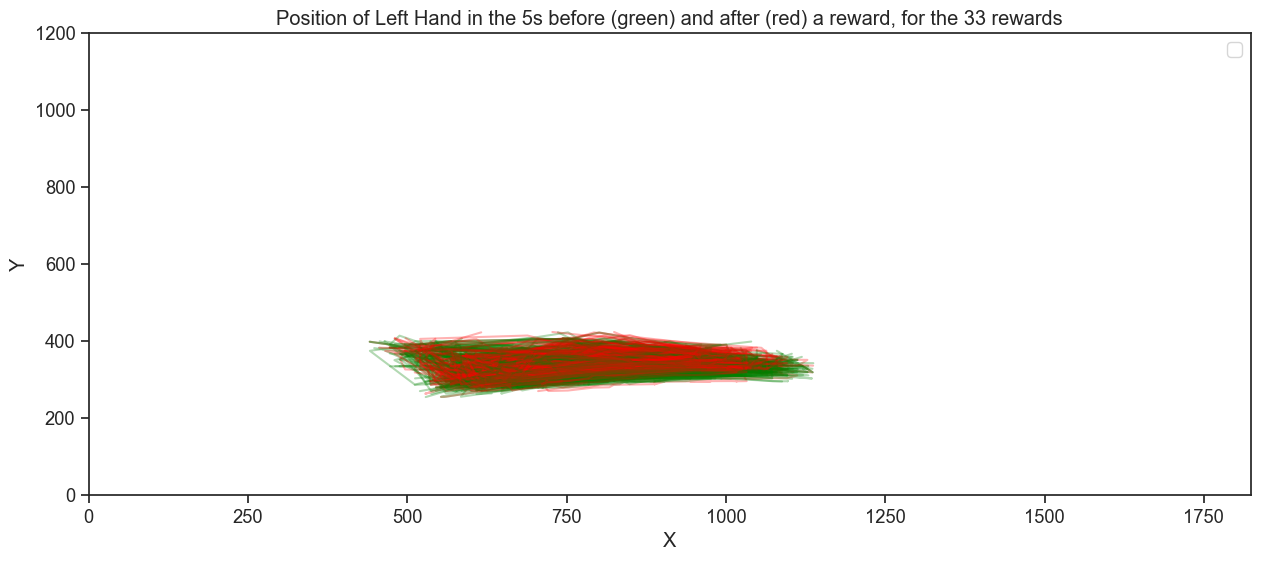

(300,)


In [589]:
for i, array in enumerate(position_arrays):
    x_coords = array[:, 0]
    y_coords = 1200 - array[:, 1]

    # Separate the points into first 150 and last 150 positions
    first_150_mask = np.arange(len(array)) < 150
    last_150_mask = np.arange(len(array)) >= len(array) - 150

    # Plot the first 150 points in green
    plt.plot(x_coords[first_150_mask], y_coords[first_150_mask], alpha=0.3, color='green')

    # Plot the last 150 points in red
    plt.plot(x_coords[last_150_mask], y_coords[last_150_mask], alpha=0.3, color='red')

# Set plot labels and limits
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Position of Left Hand in the 5s before (green) and after (red) a reward, for the 33 rewards")
plt.xlim(0, 1824)
plt.ylim(0, 1200)

# Show the legend
plt.legend()

# Show the plot
plt.show()


print(first_150_mask.shape)

In [590]:
first_150_values = [arr[:149] for arr in position_arrays]
last_150_values = [arr[150:299] for arr in position_arrays]

for i in range(33):
    plt.scatter(first_150_values[i], color='green', label=f'Array {i+1}')

# Plotting the last 150 values of each array in red
for i in range(33):
    plt.scatter(range(150, 300), last_150_values[i], color='red')

# Set plot labels and legend
plt.xlabel('Position on Array')
plt.ylabel('Value')
plt.legend(loc='upper right')

# Show the plot
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

C:\Users\delet\AppData\Local\Temp\ipykernel_2016\2276927812.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


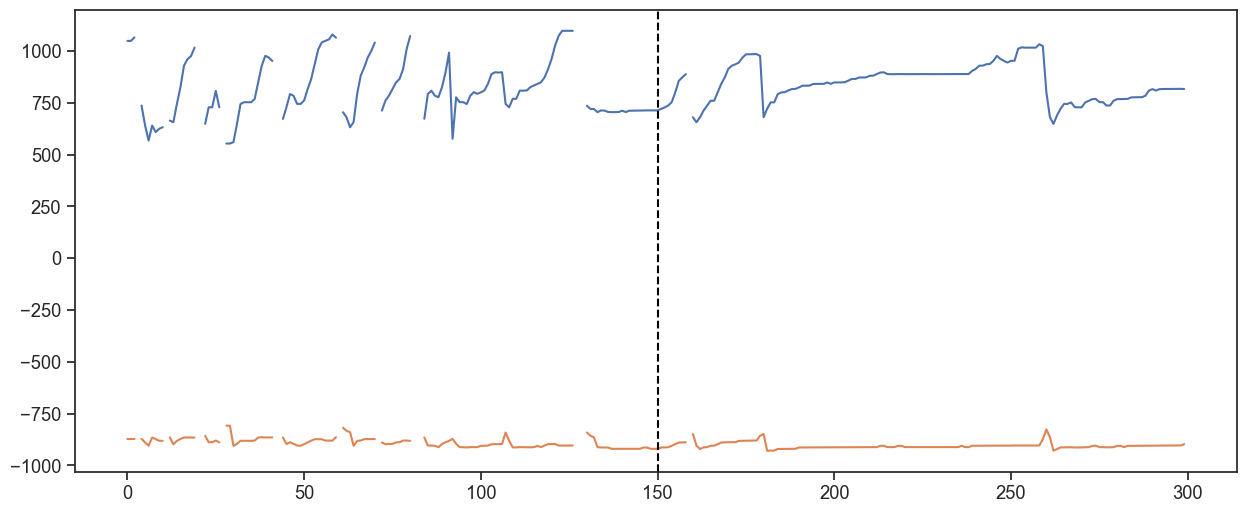

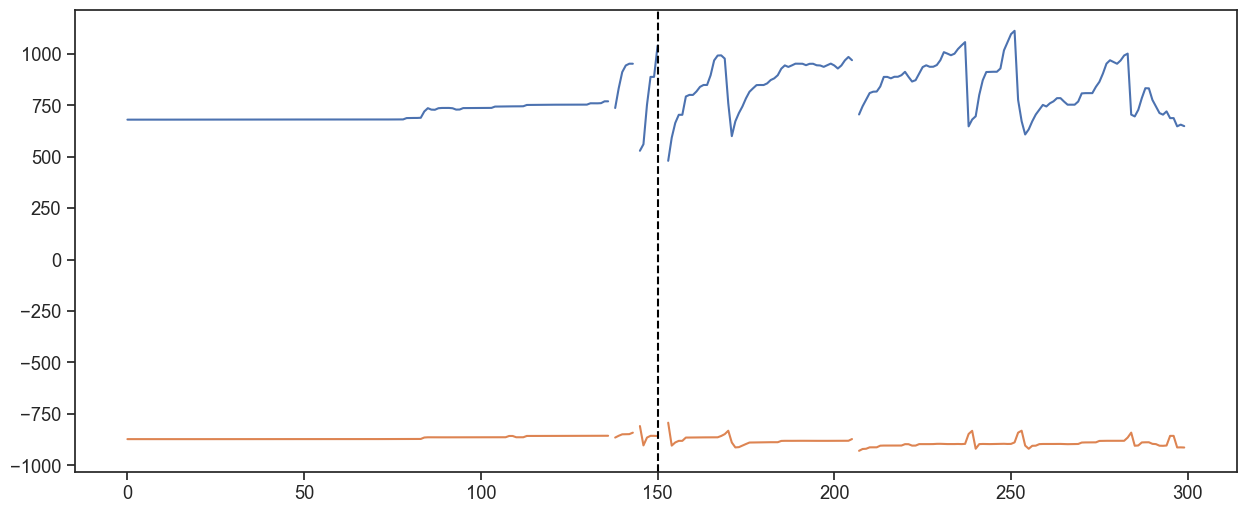

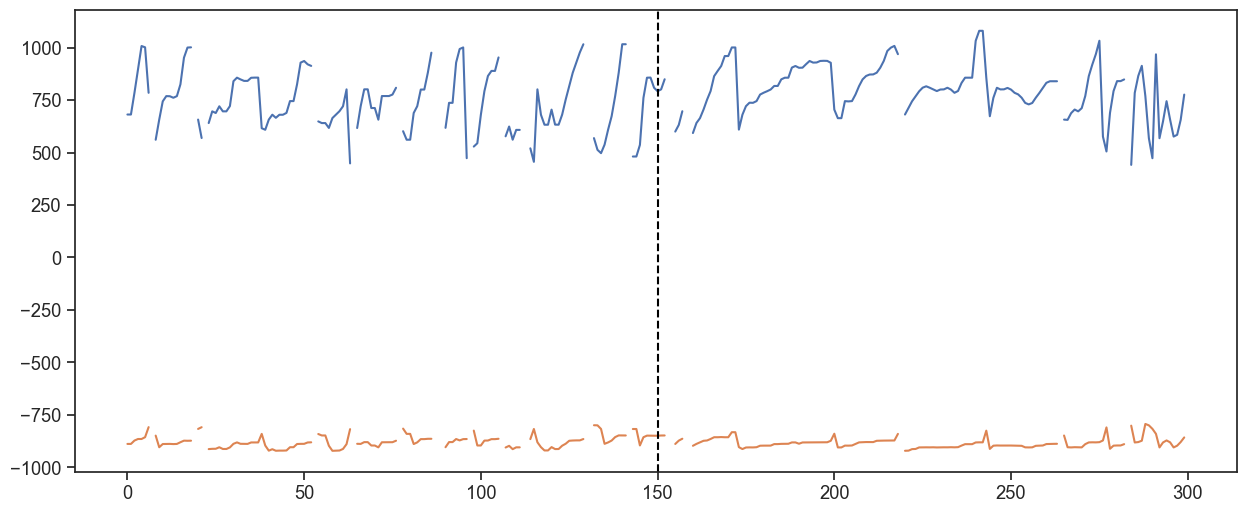

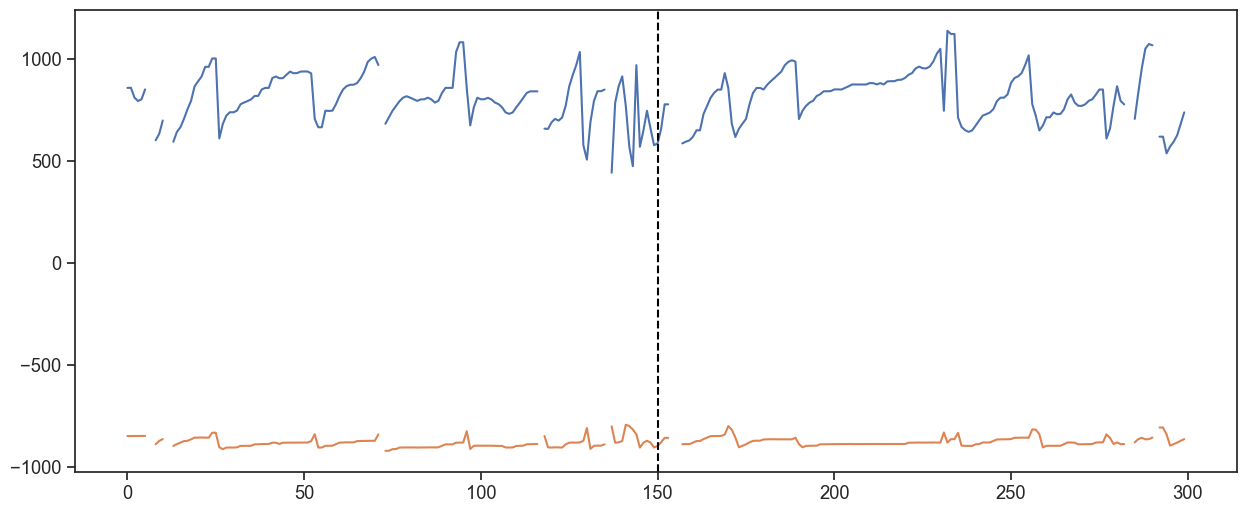

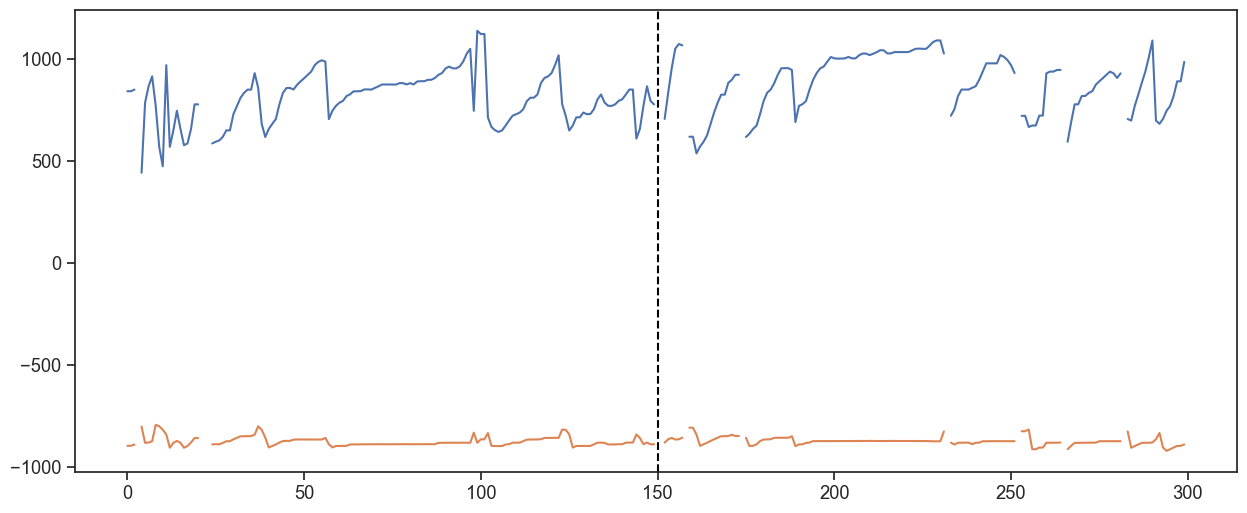

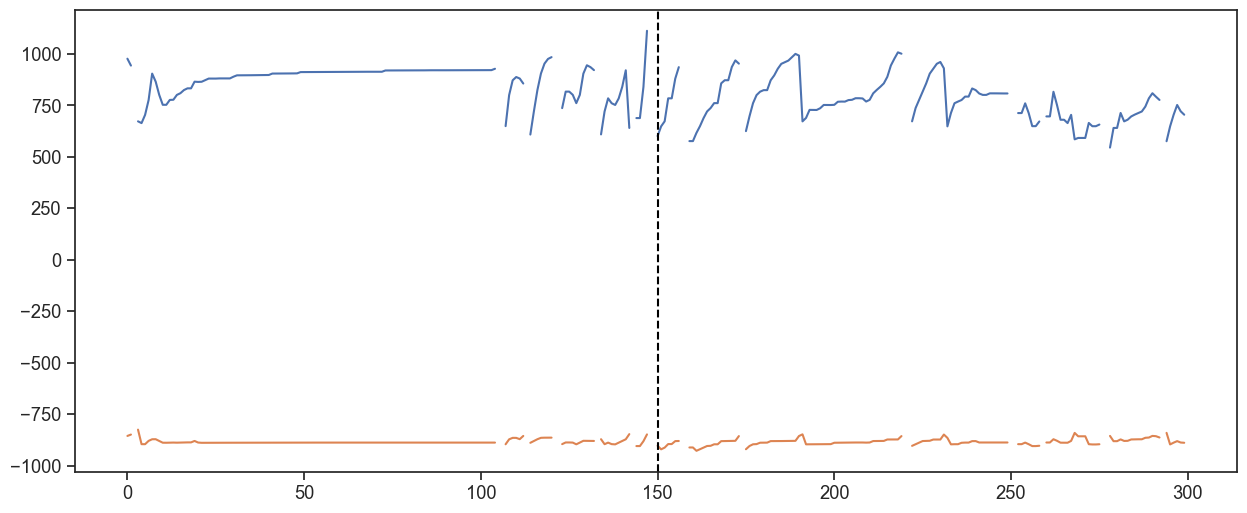

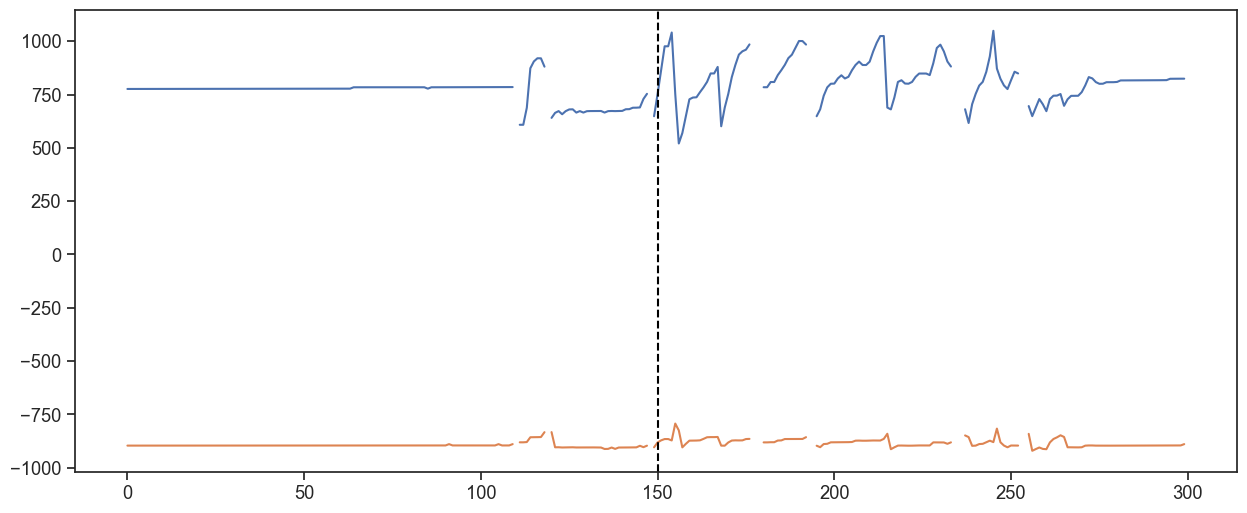

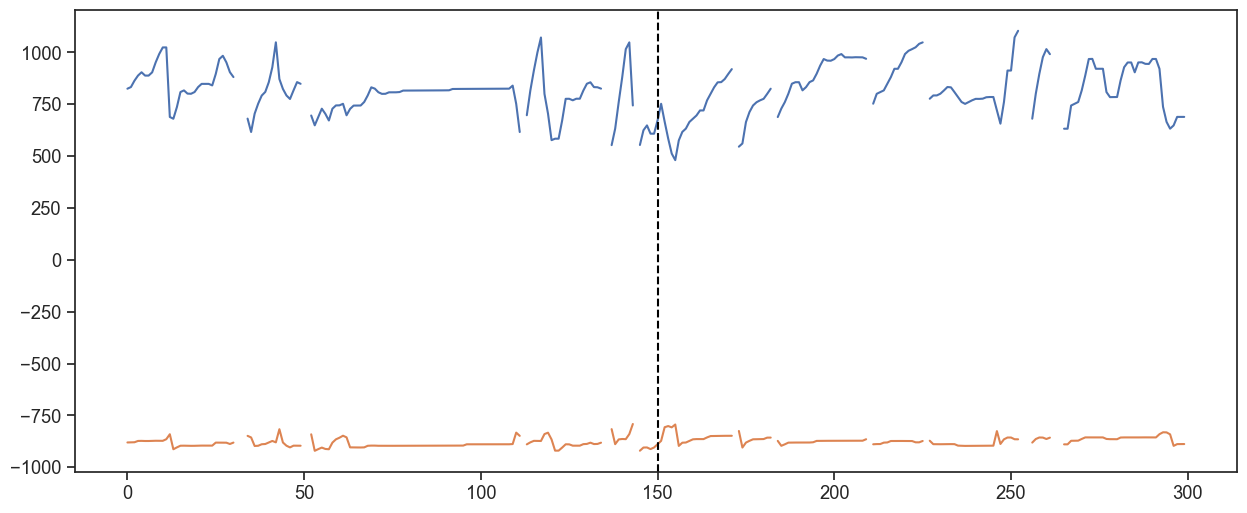

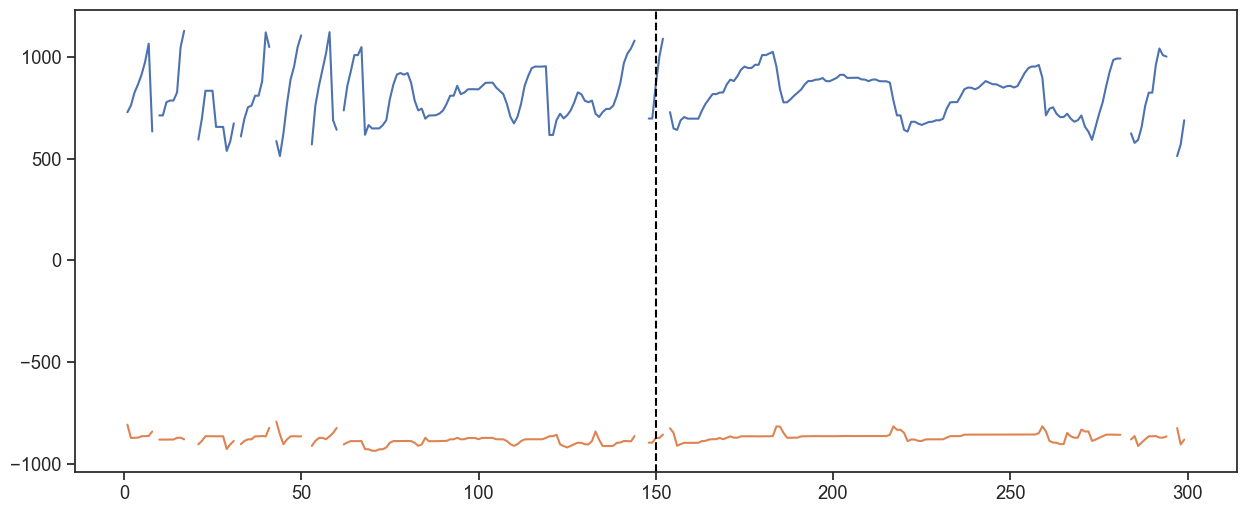

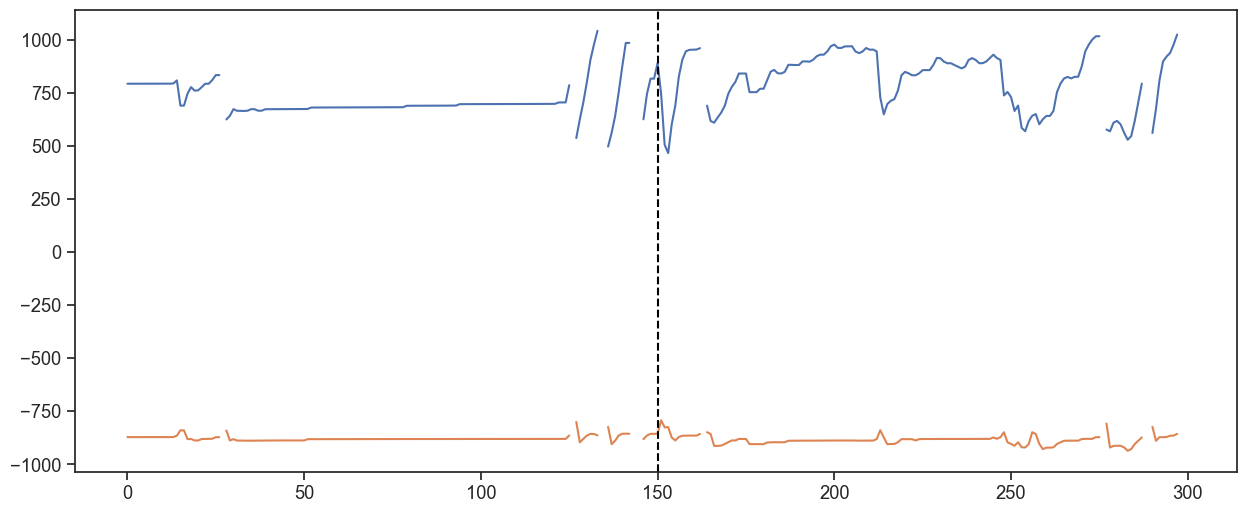

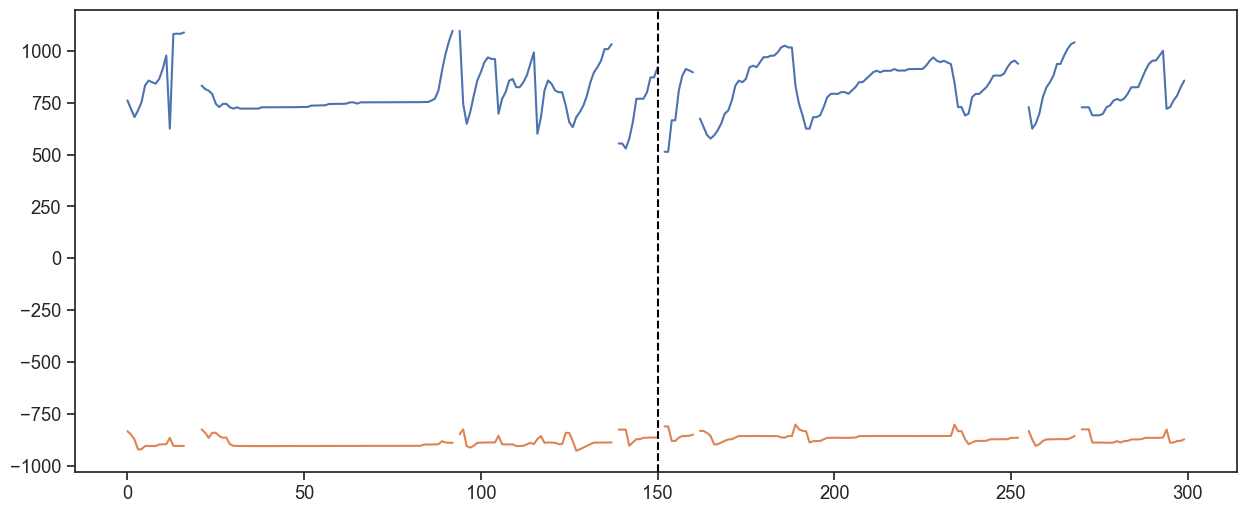

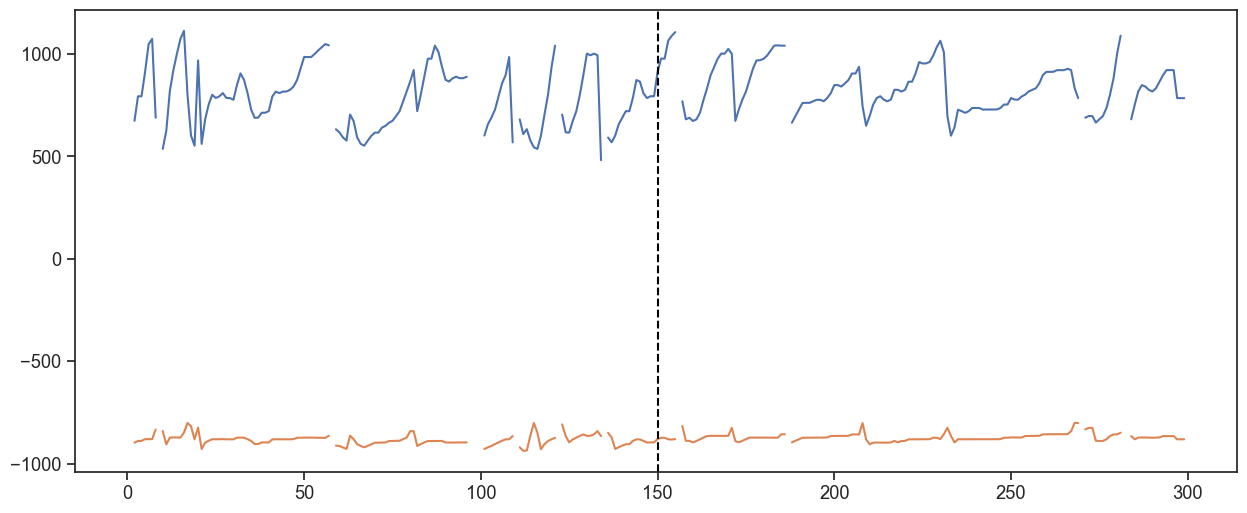

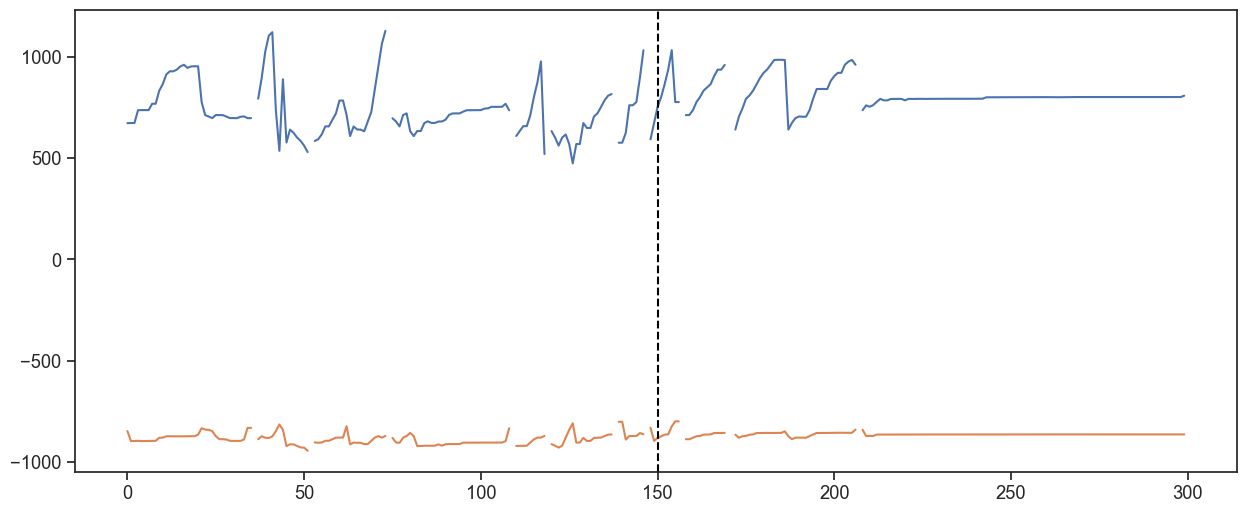

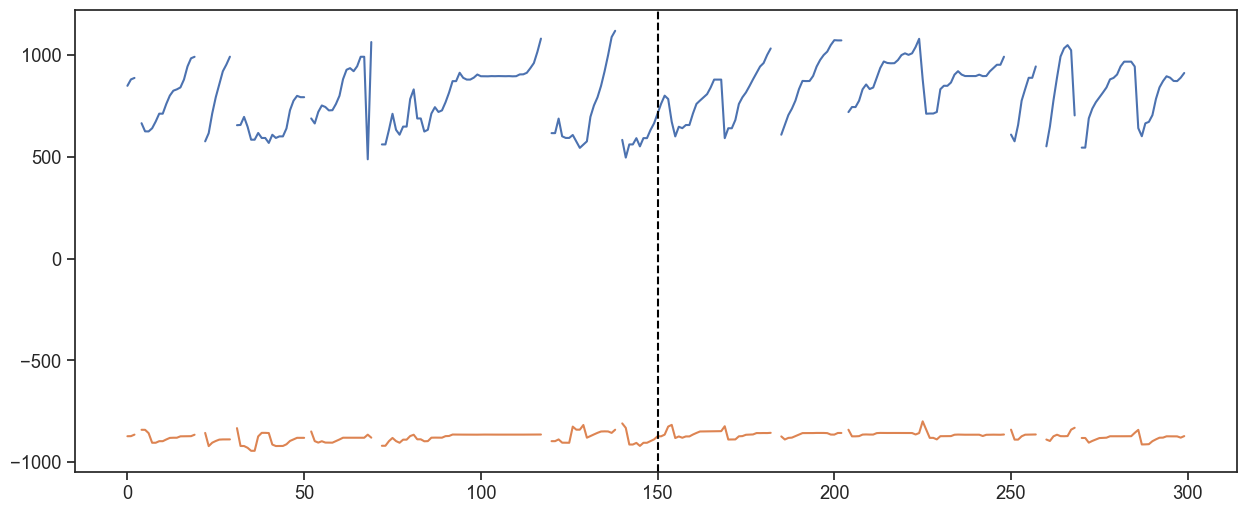

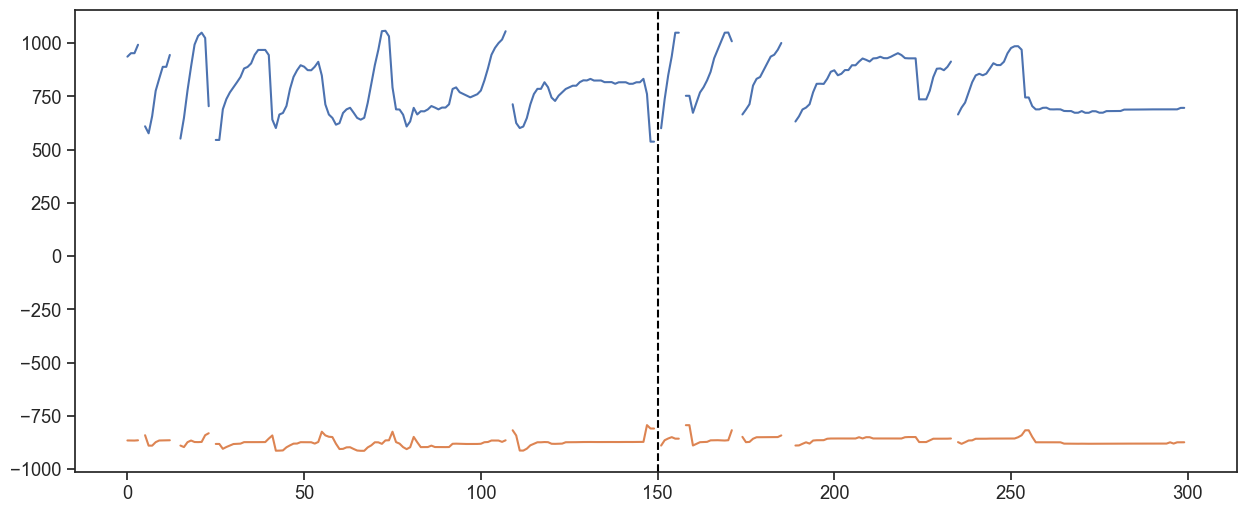

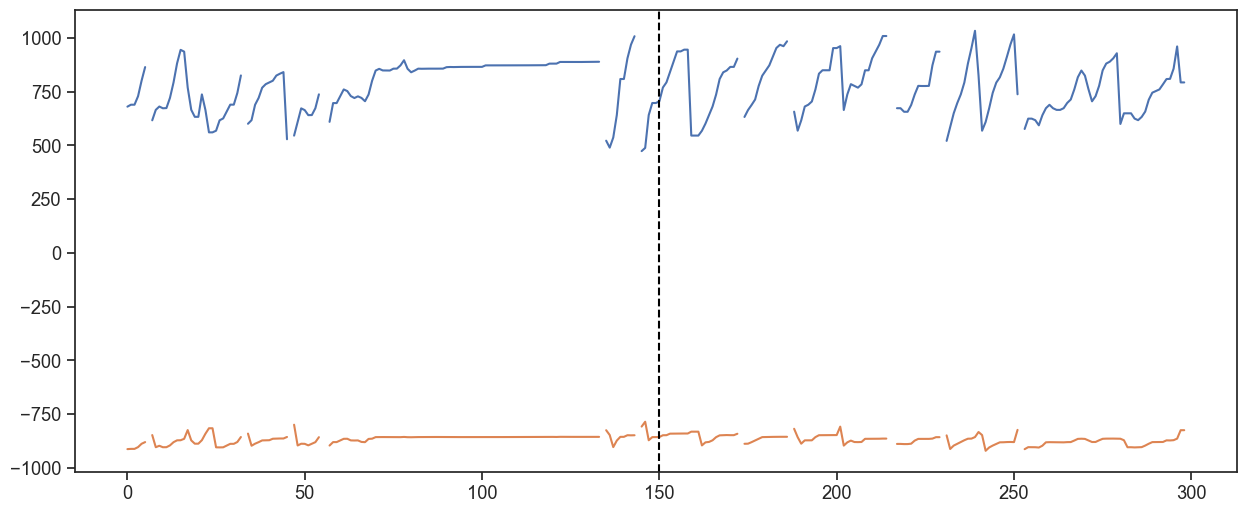

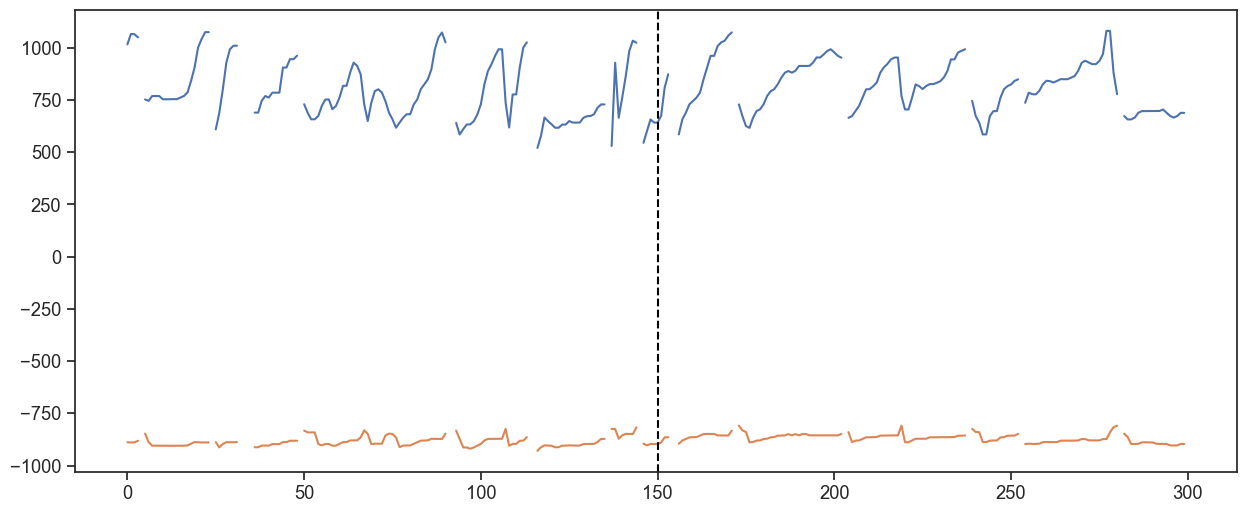

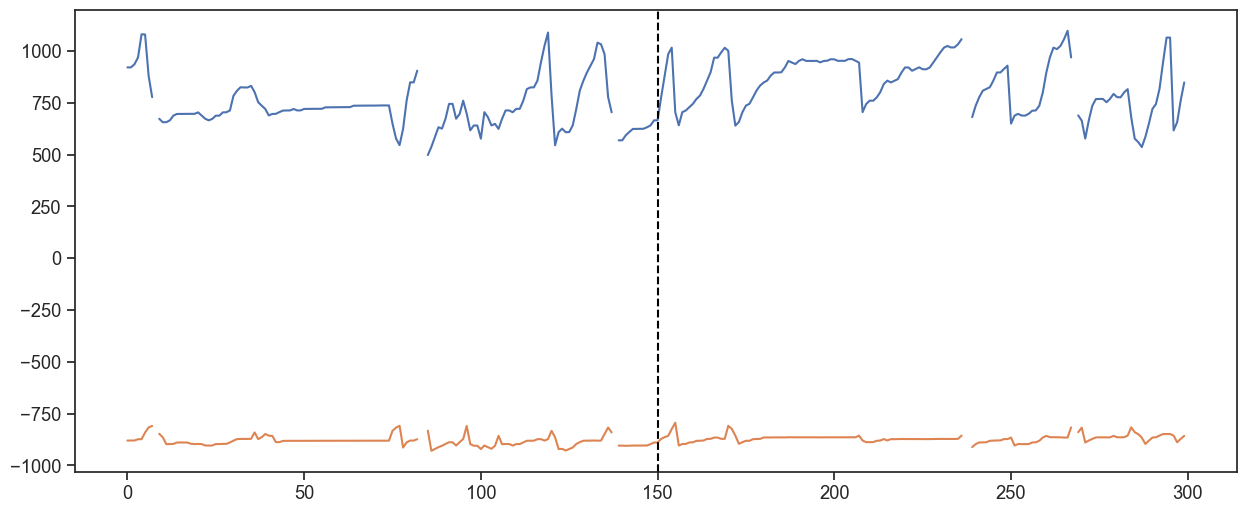

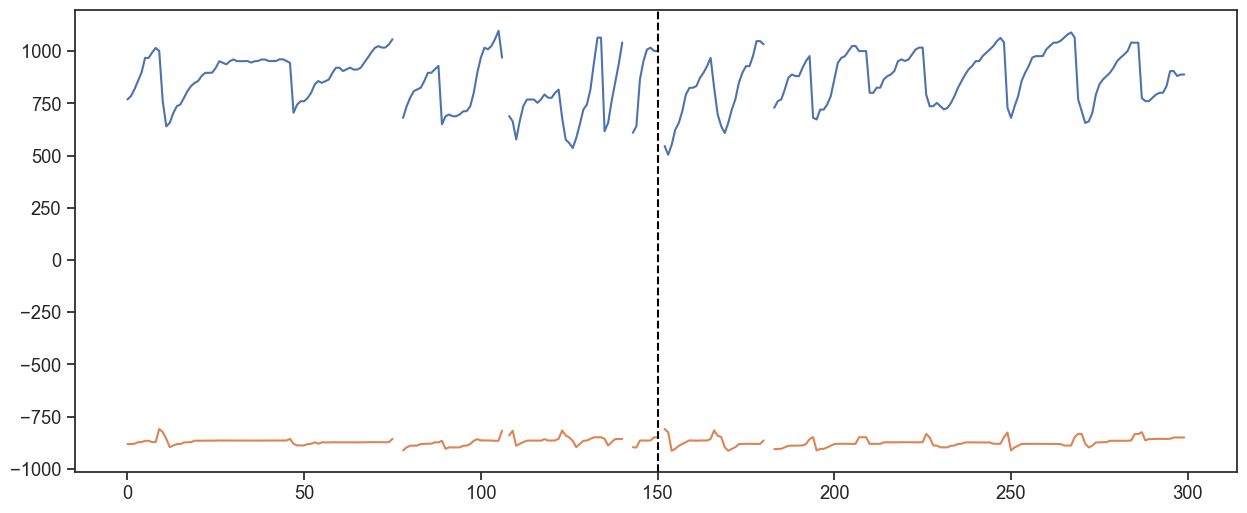

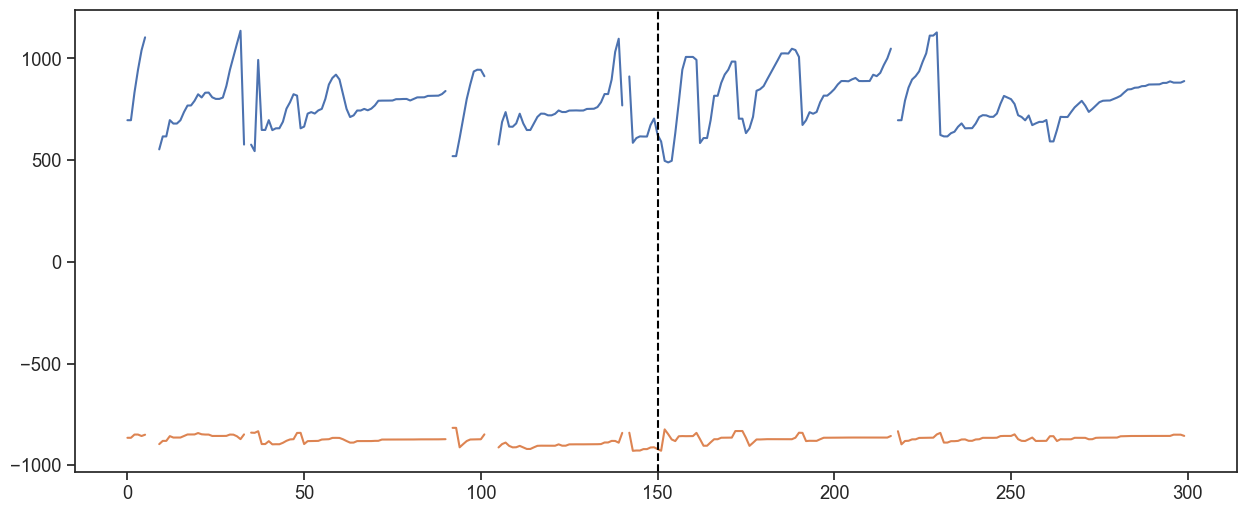

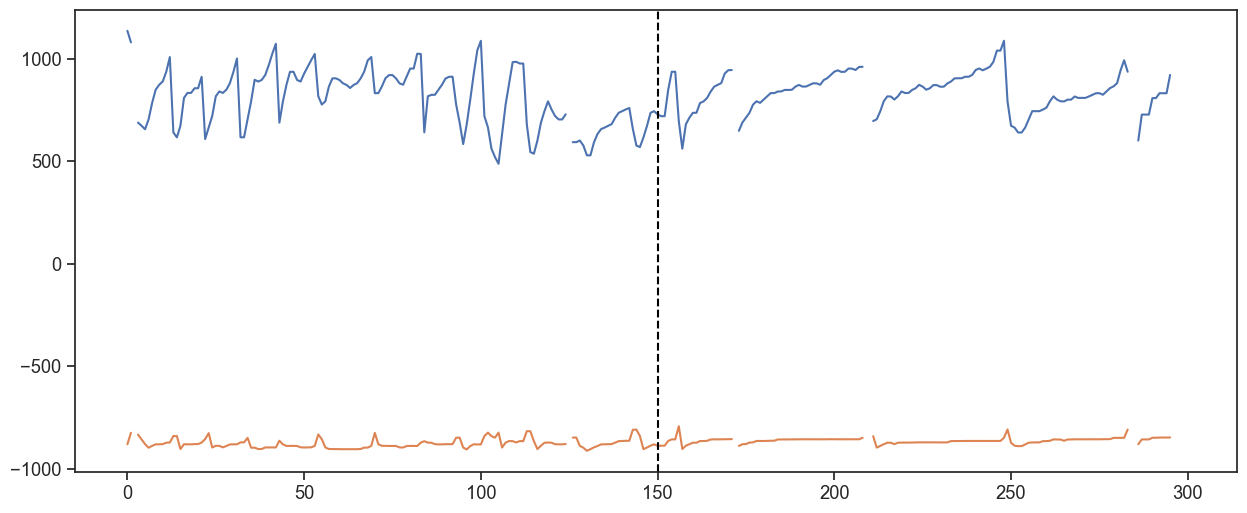

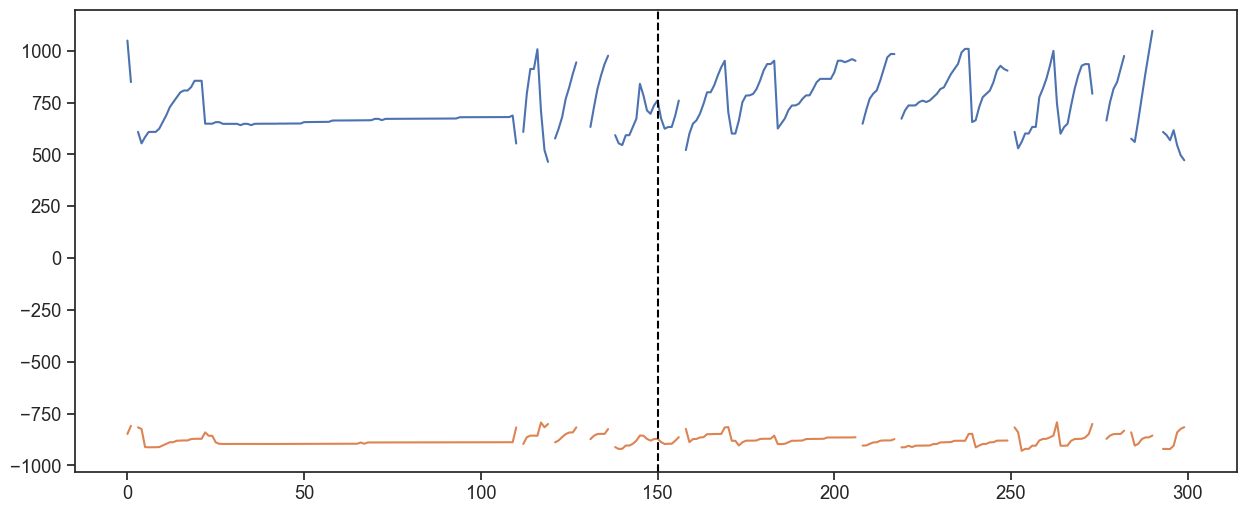

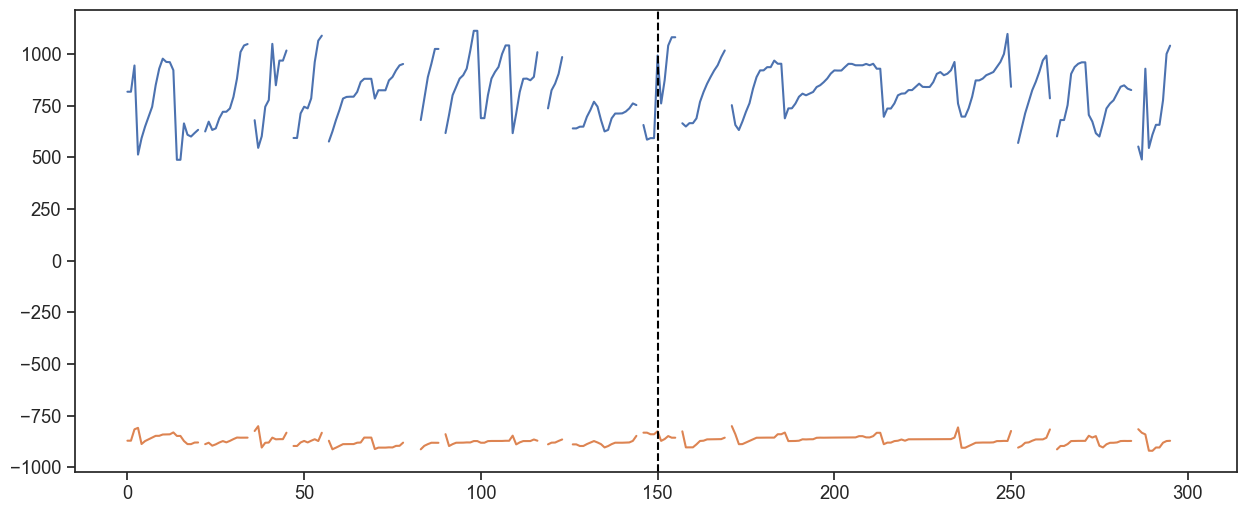

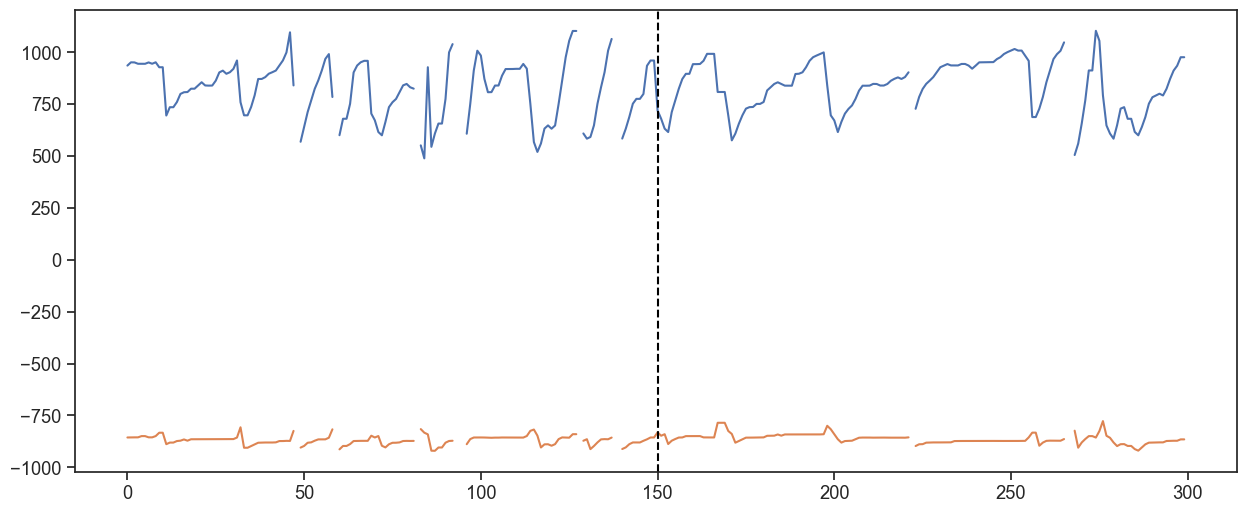

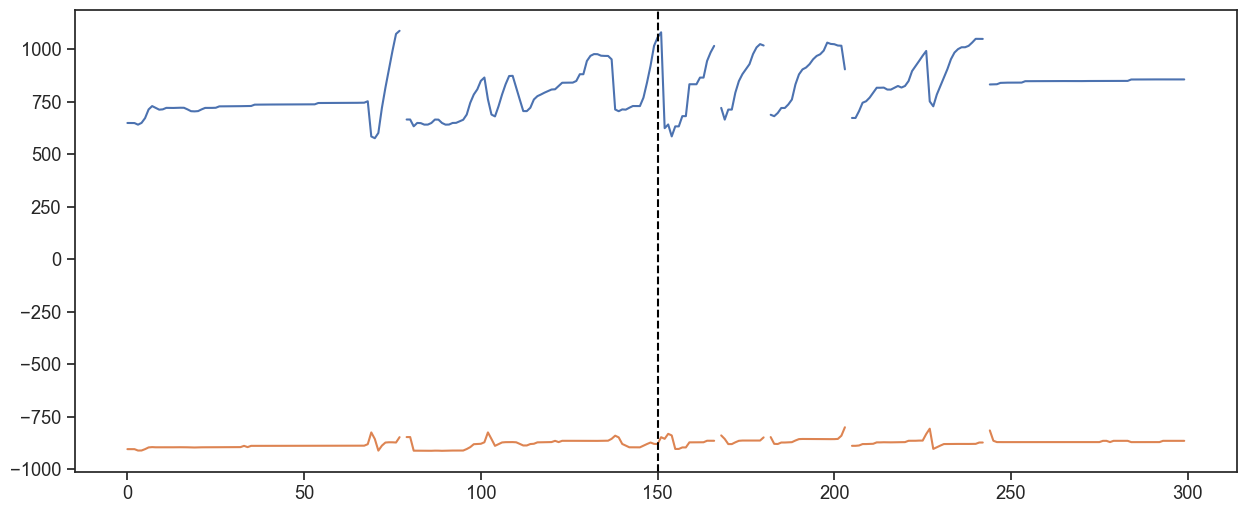

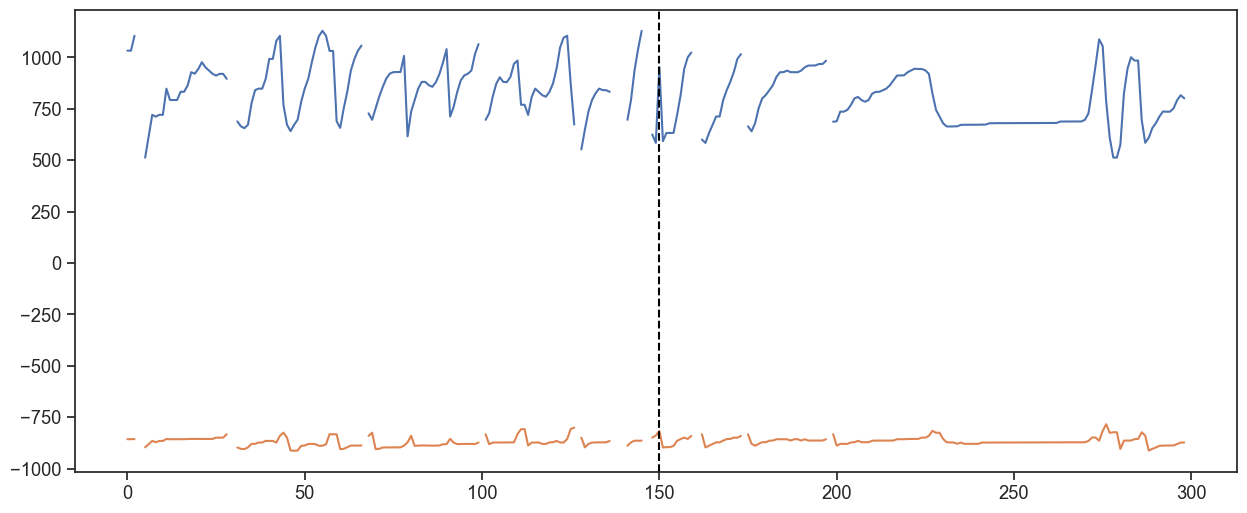

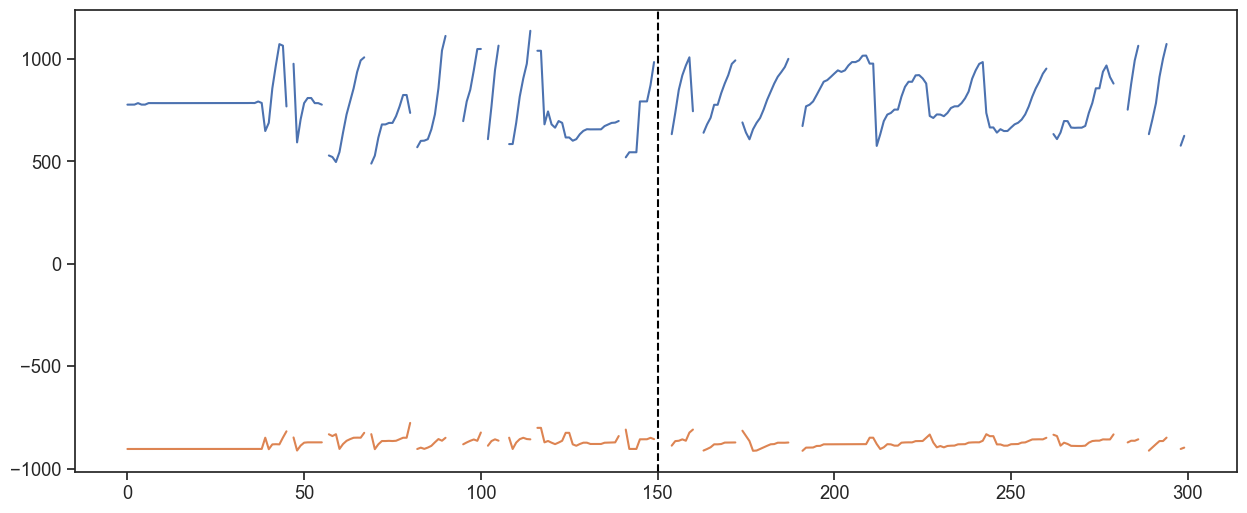

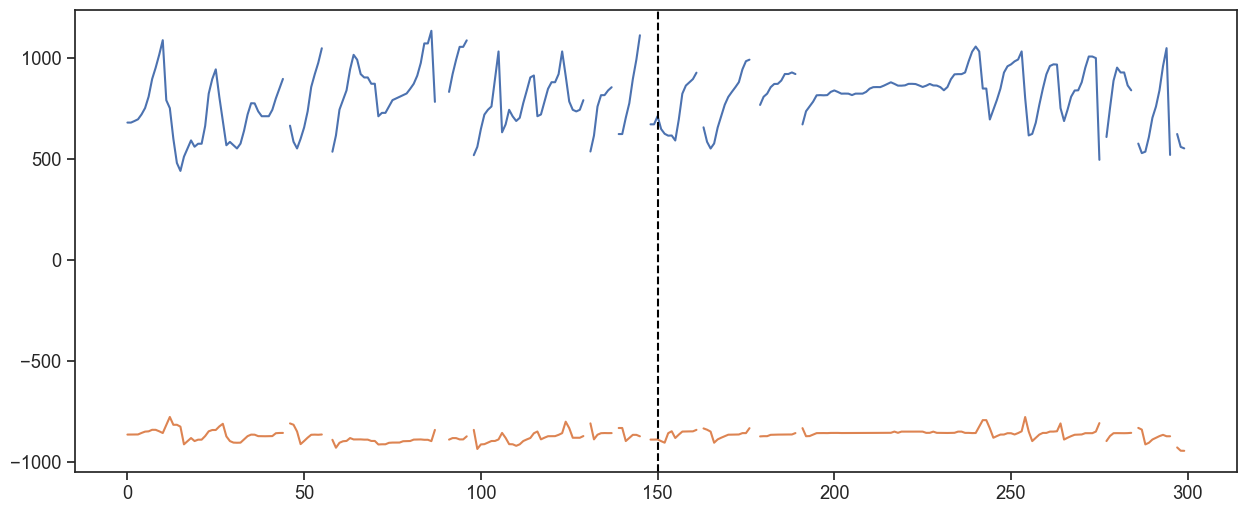

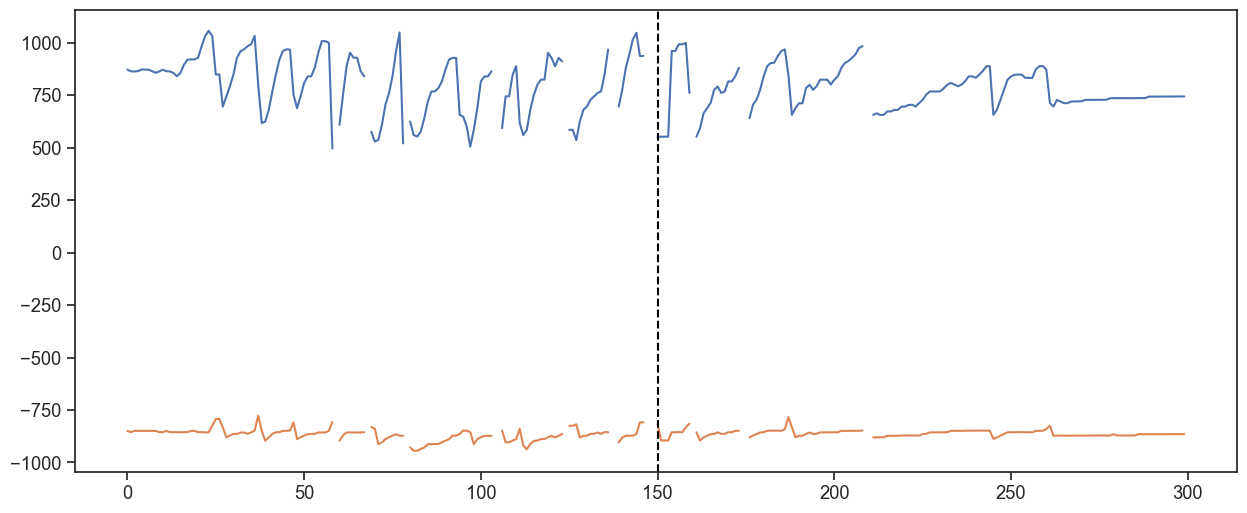

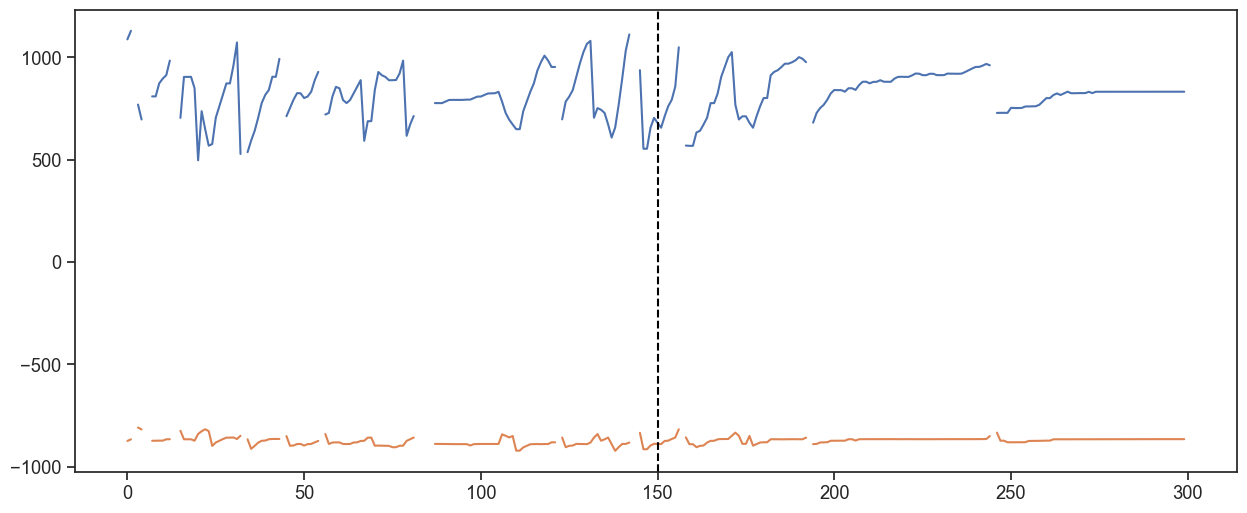

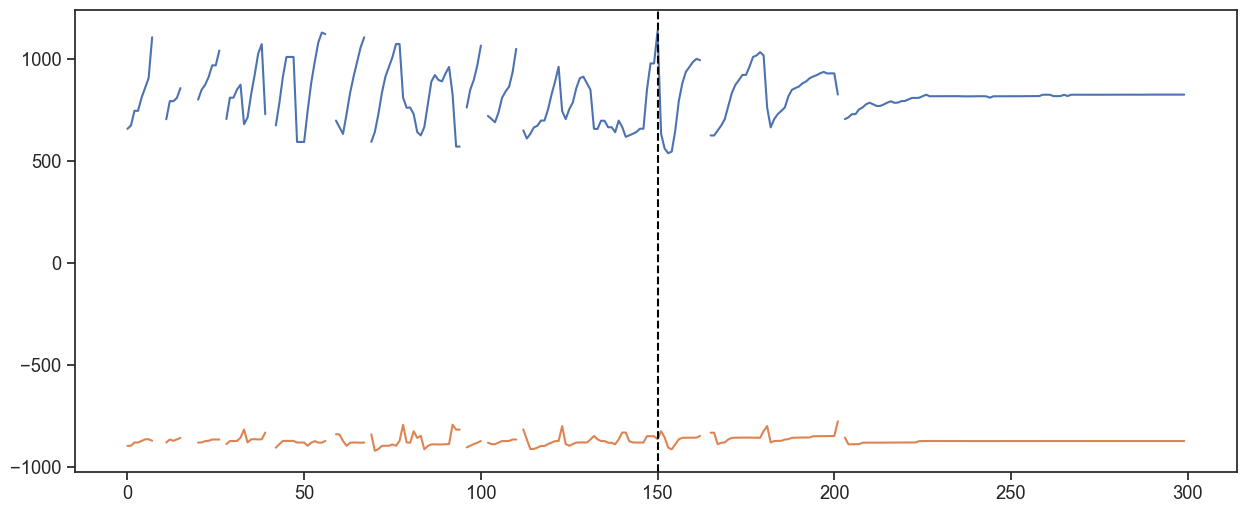

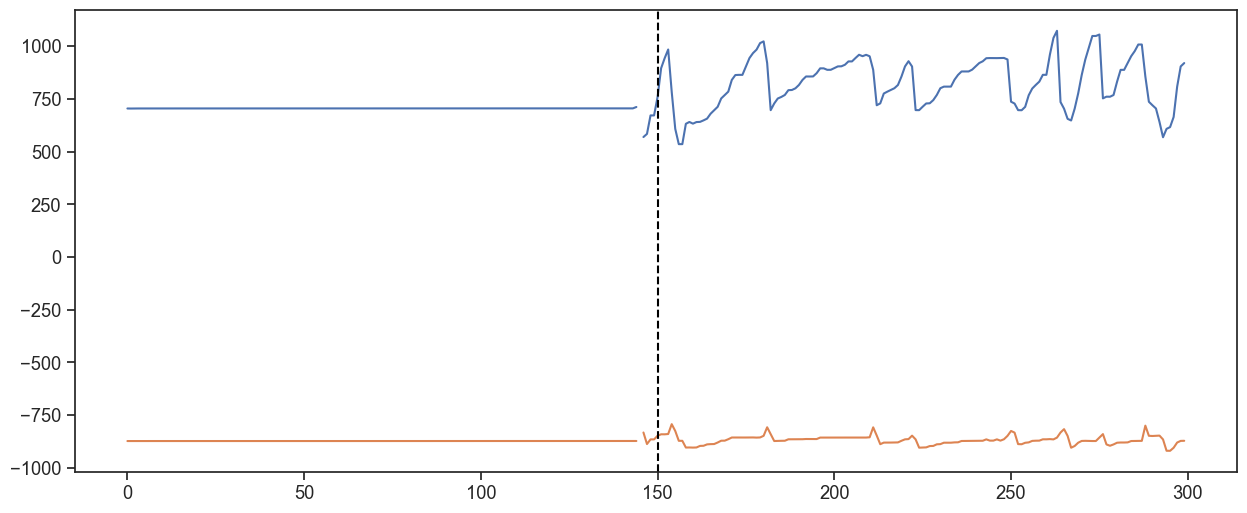

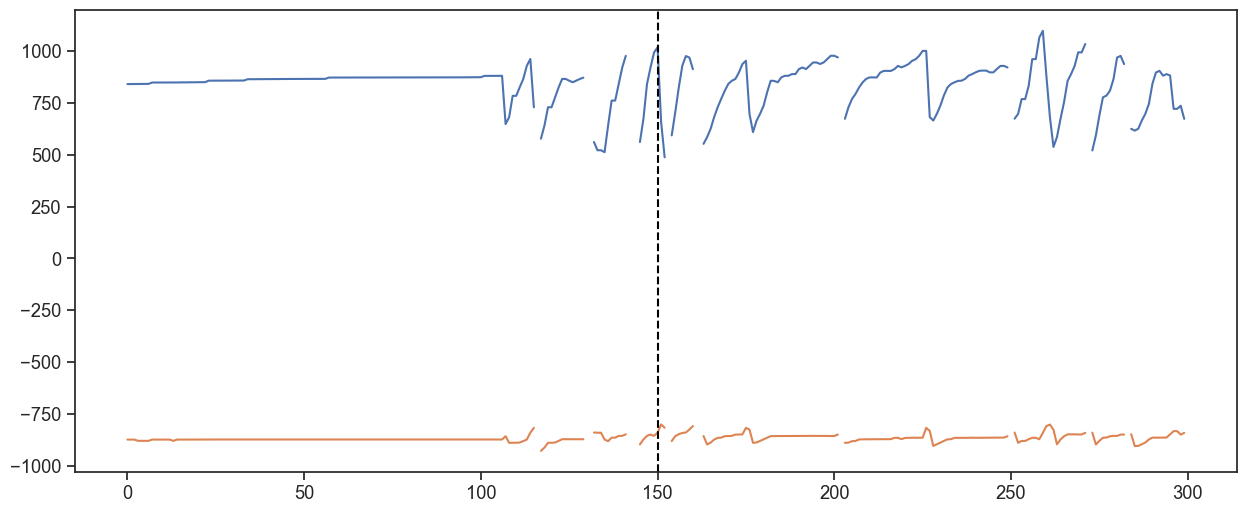

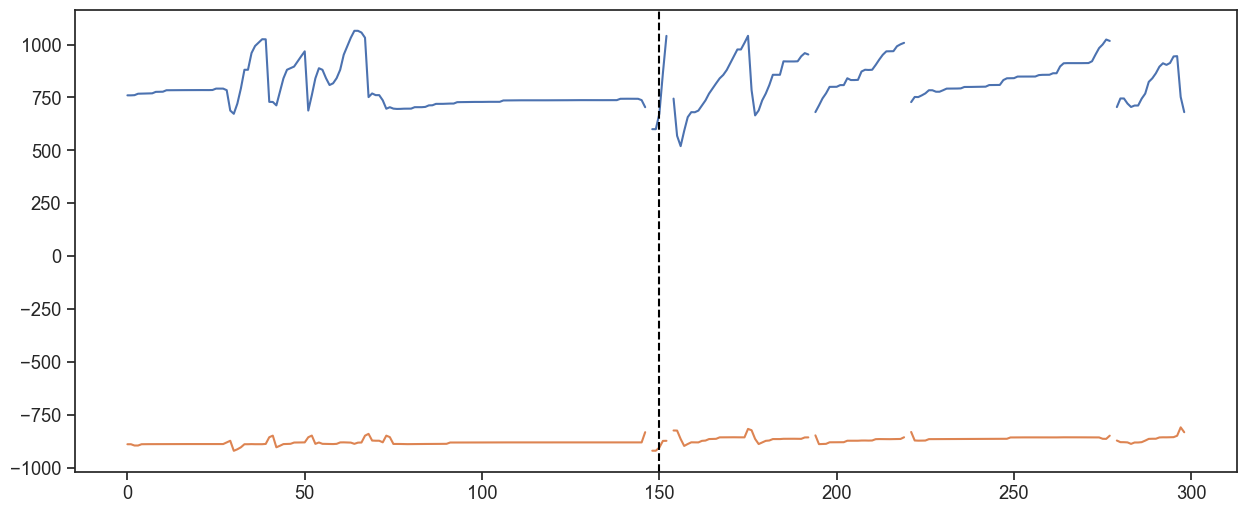

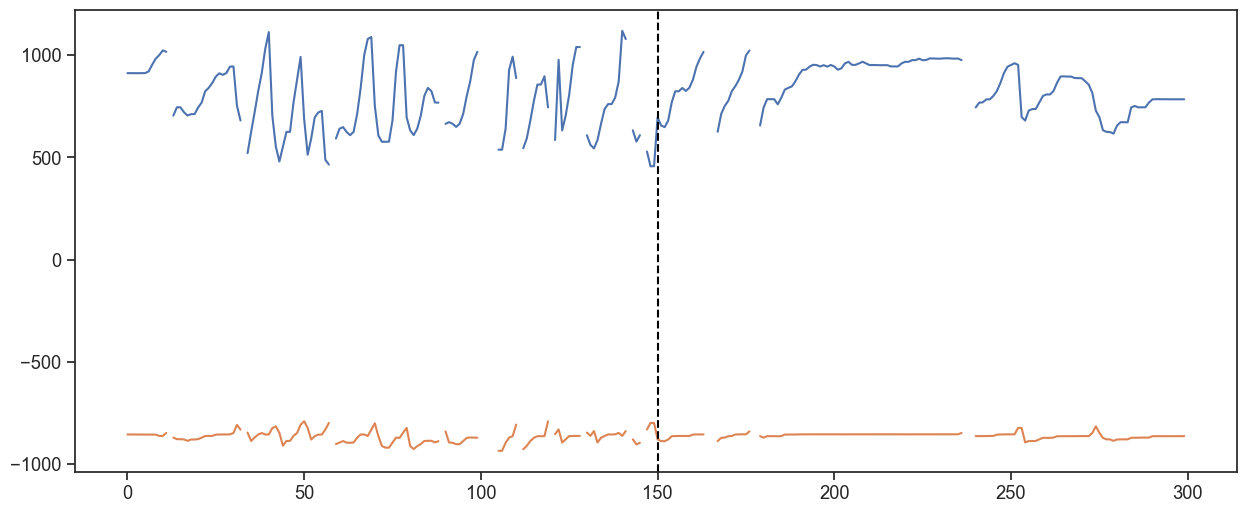

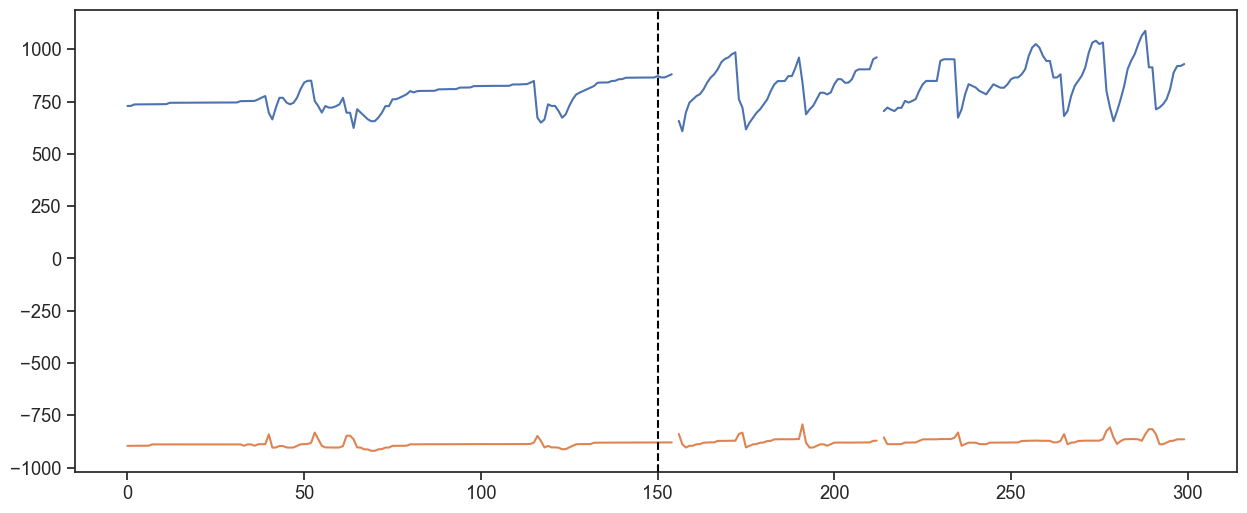

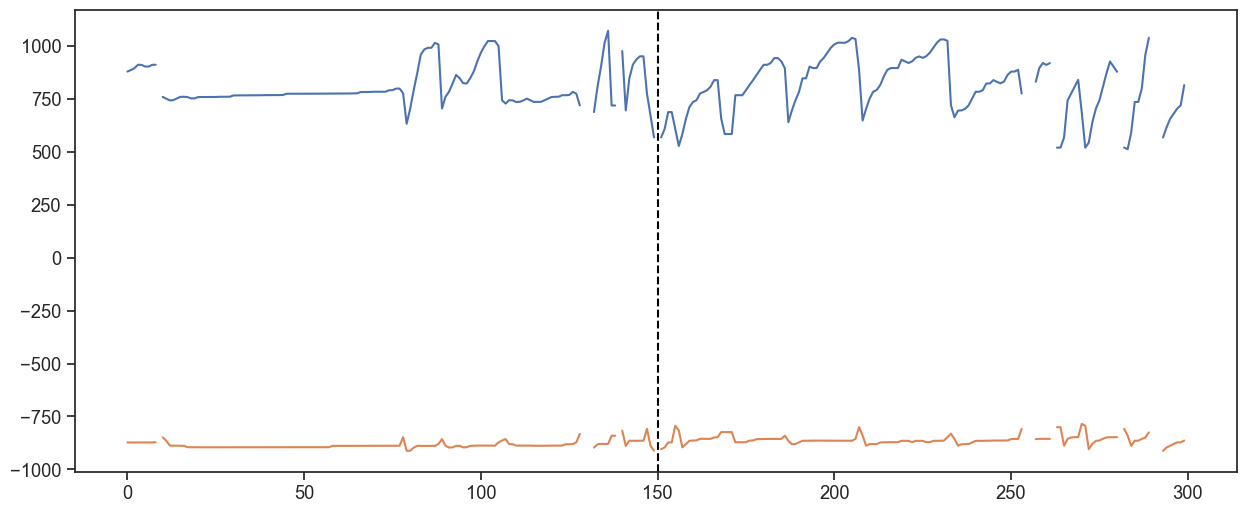

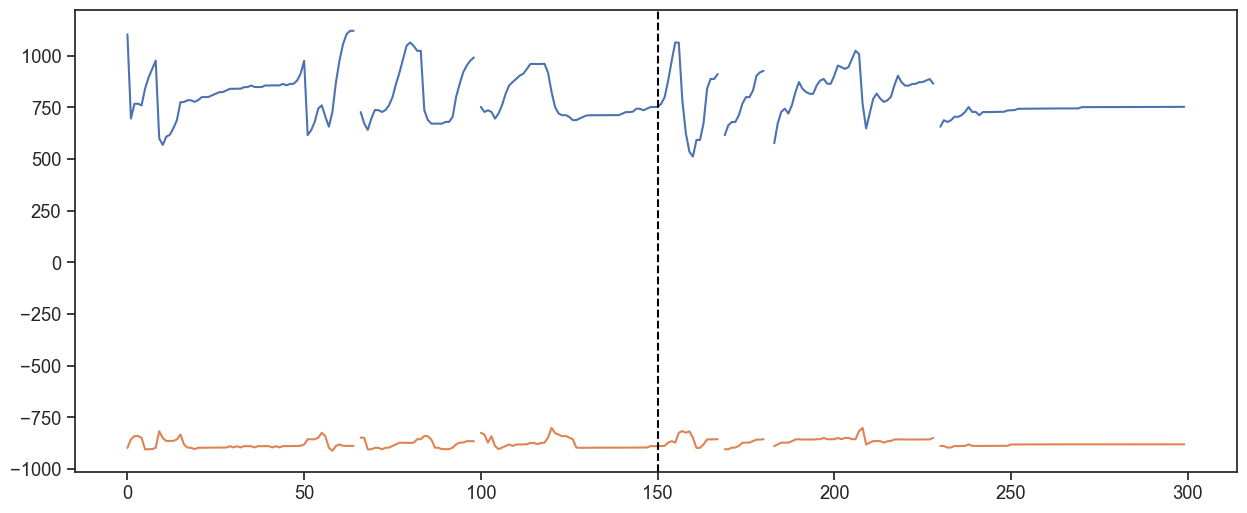

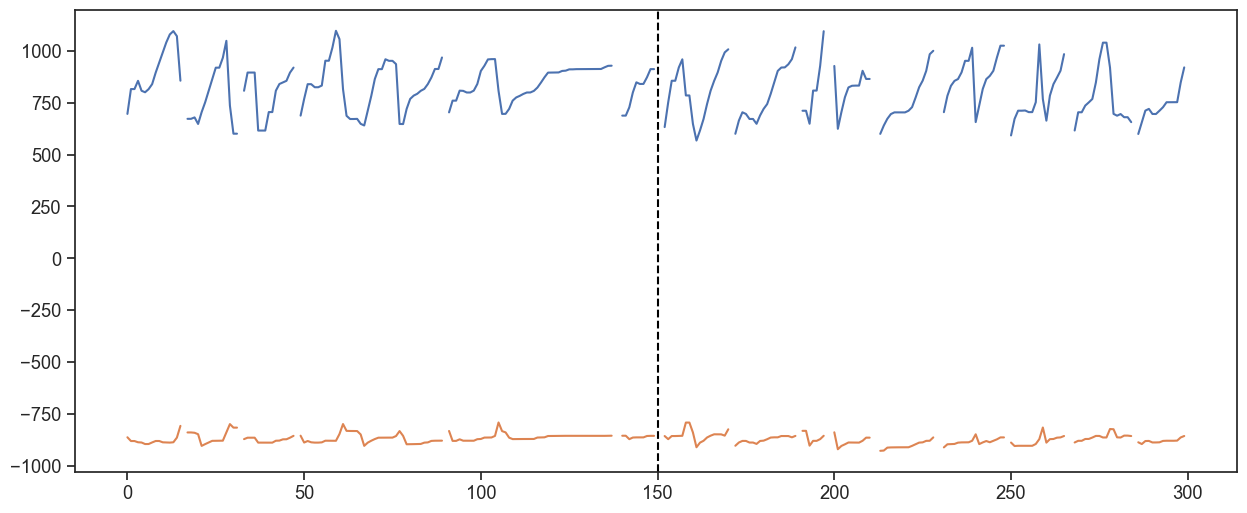

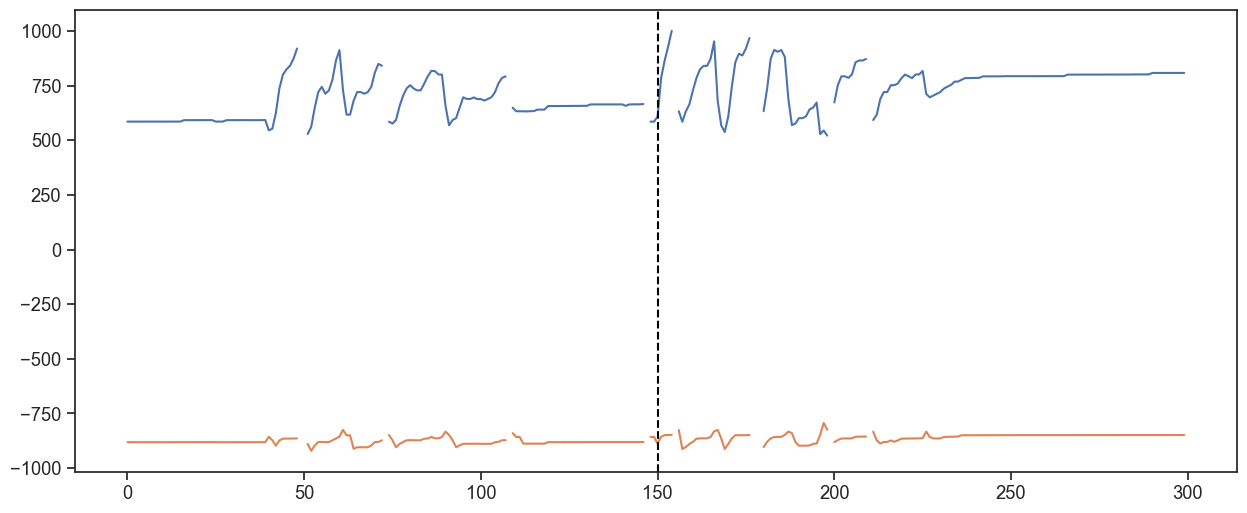

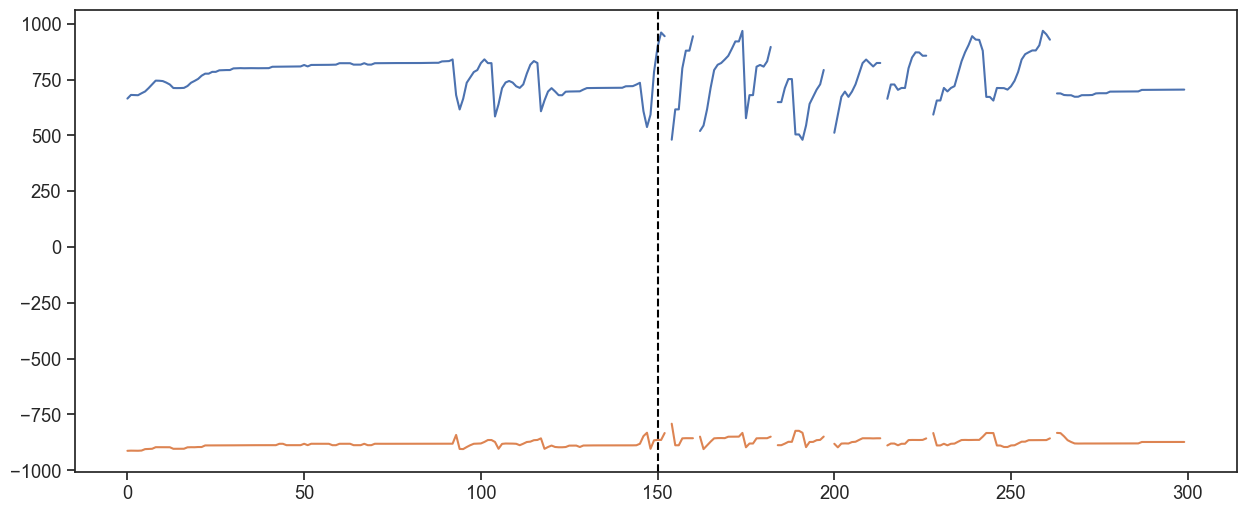

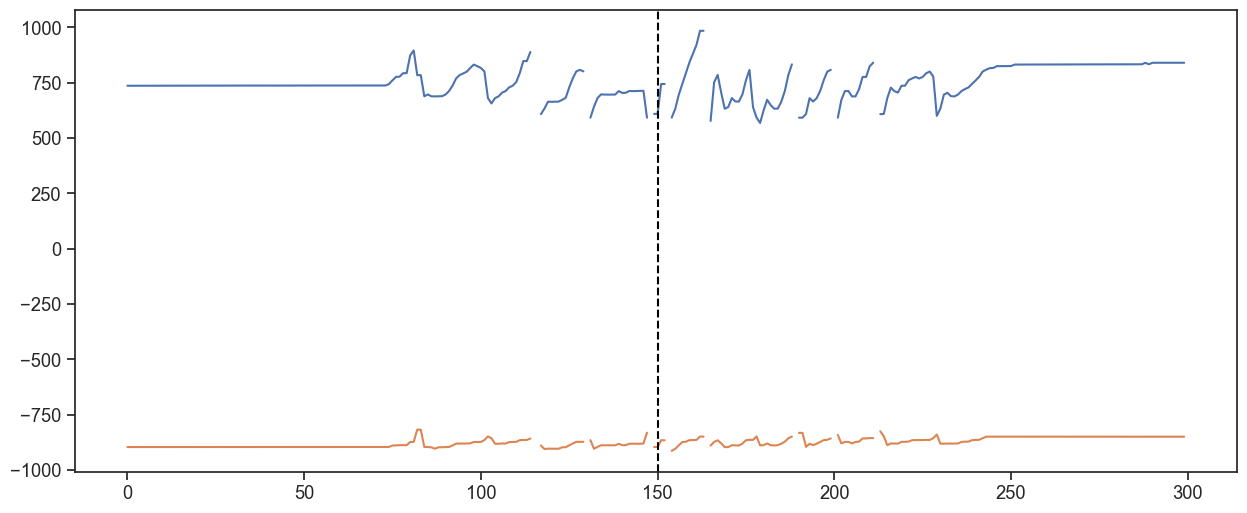

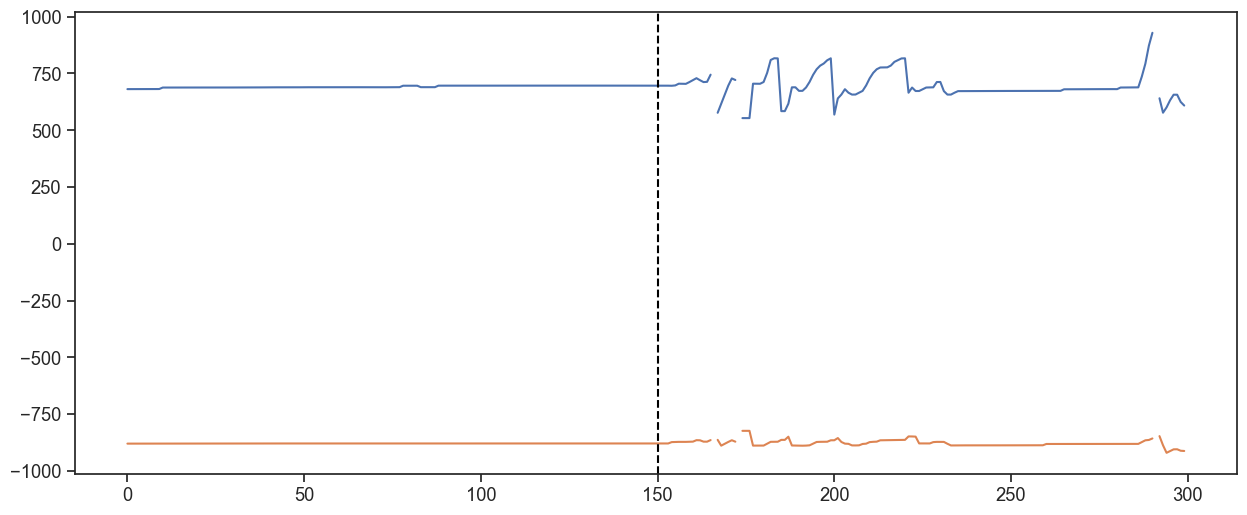

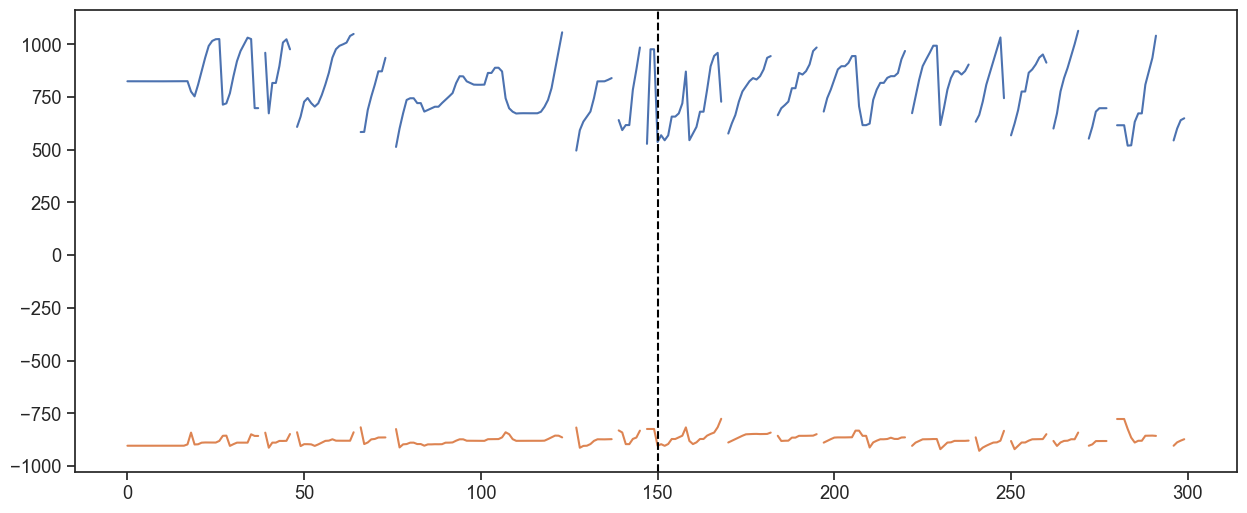

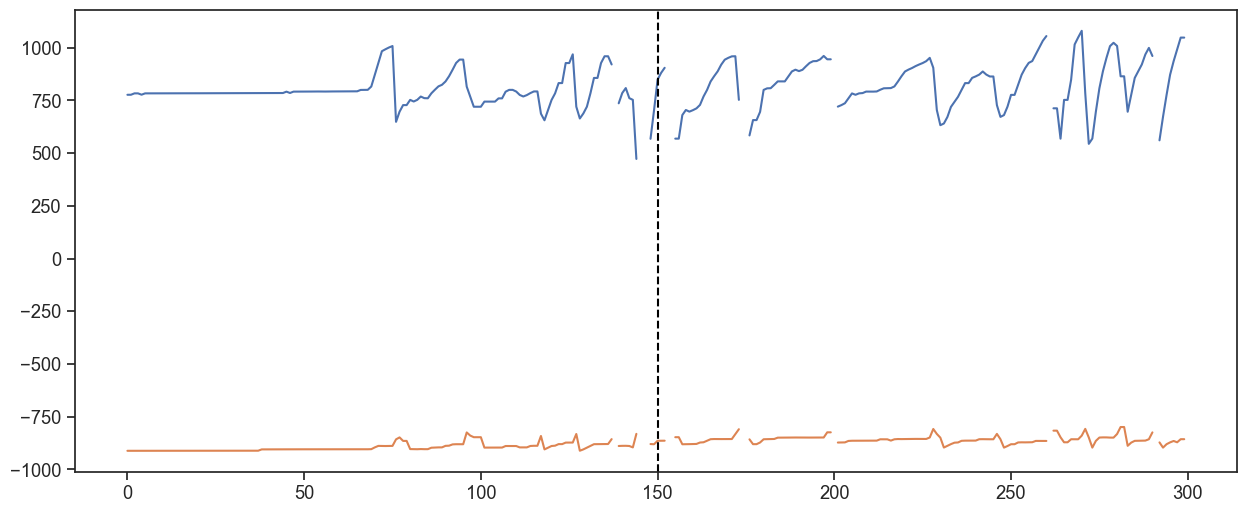

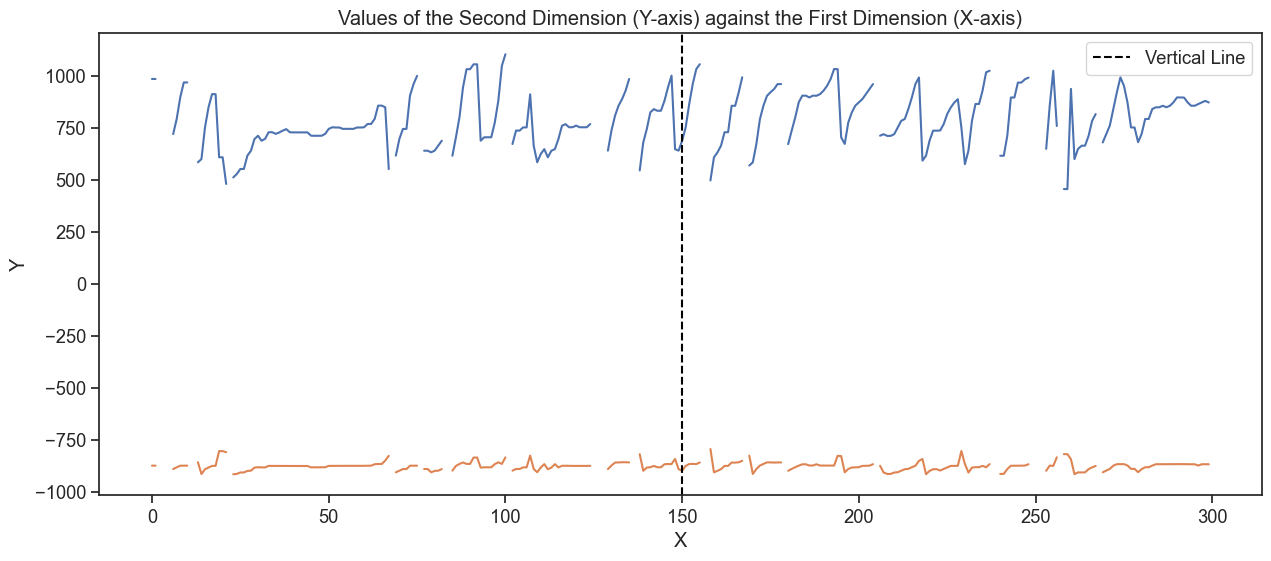

In [606]:
for i, array in enumerate(position_arrays):
    x_coords = array[:, 0]
    y_coords = array[:, 1]
    
    plt.figure()
    plt.plot(x_coords)
    plt.plot(-1*y_coords)
    plt.axvline(x=150, color='black', linestyle='--', label='Vertical Line')

# Add labels and legend
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Values of the Second Dimension (Y-axis) against the First Dimension (X-axis)")
plt.legend()
plt.show()

In [607]:
mean_array = np.mean(event_arrays_5s[1:], axis=0)
print(len(mean_array))

300


In [608]:
median_array = np.median(event_arrays_5s[1:], axis=0)
print(len(median_array))

300


In [609]:




mean_array_5s_nose = np.mean(event_arrays_5s_tongue, axis=0)
max_mean_array_5s_nose=np.max(mean_array_5s_nose)
mean_array_5s_nose_norm=mean_array_5s_nose/max_mean_array_5s_nose


mean_array_5s_mouth = np.mean(event_arrays_5s_mouth, axis=0)
max_mean_array_5s_mouth=np.max(mean_array_5s_mouth)
mean_array_5s_mouth_norm=mean_array_5s_mouth/max_mean_array_5s_mouth




mean_array_5s_tongue = np.mean(event_arrays_5s_tongue, axis=0)
max_mean_array_5s_tongue=np.max(mean_array_5s_tongue)
mean_array_5s_tongue_norm=mean_array_5s_tongue/max_mean_array_5s_tongue





mean_array_5s_leftfoot = np.mean(event_arrays_5s_leftfoot, axis=0)
max_mean_array_5s_leftfoot=np.max(mean_array_5s_leftfoot)
mean_array_5s_leftfoot_norm=mean_array_5s_leftfoot/max_mean_array_5s_leftfoot




mean_array_5s_righthand = np.mean(event_arrays_5s_righthand, axis=0)
max_mean_array_5s_righthand=np.max(mean_array_5s_righthand)
mean_array_5s_righthand_norm=mean_array_5s_righthand/max_mean_array_5s_righthand

      
      
mean_array_5s_ear = np.mean(event_arrays_5s_ear, axis=0)
max_mean_array_5s_ear=np.max(mean_array_5s_ear)
mean_array_5s_ear_norm=mean_array_5s_ear/max_mean_array_5s_ear



In [610]:
median_array_5s = np.median(event_arrays_5s[1:], axis=0)
max_median_array_5s=np.max(median_array_5s)
median_array_5s_norm=median_array_5s/max_median_array_5s

print(len(median_array_5s))


300


In [611]:
print(mean_array_5s)

[ 51.65995986  61.33829347  75.52230004  25.86766816  35.38149605
  52.4435487   34.80889774  50.74258243  63.42370581  36.8017115
  48.94686967  61.30300396  46.38197627  54.47210502  78.79415553
  41.7546355   49.82243548  94.56354351  48.92767173  48.96282977
  30.38925241  62.68882744  51.1061115   49.06733218  40.72068373
  28.65548325  29.72262817  45.93851011  75.07762091  32.59946118
  78.52110076  64.39891808  30.54934548  64.23496891  37.6262343
  48.22144511  93.61542886  36.36348635  53.20750742  49.11607764
  61.56119343  67.75382333  79.28665263  59.27484716  72.37131149
  47.52631838  33.61388106  58.08917364  54.22703331  71.16888067
  19.02365459  28.47516394  41.97461425  88.60027037  58.61151065
  66.02899655  68.15011155  60.92339687  49.15238444  53.687769
  45.33175912 118.70253642  89.94461936 141.55395562  63.98943895
  56.55010699  71.27646804  84.95563331  57.22757649 116.43875167
  81.59554694  56.56677953  61.46673561  54.34323735  72.3852321
  93.33977319  

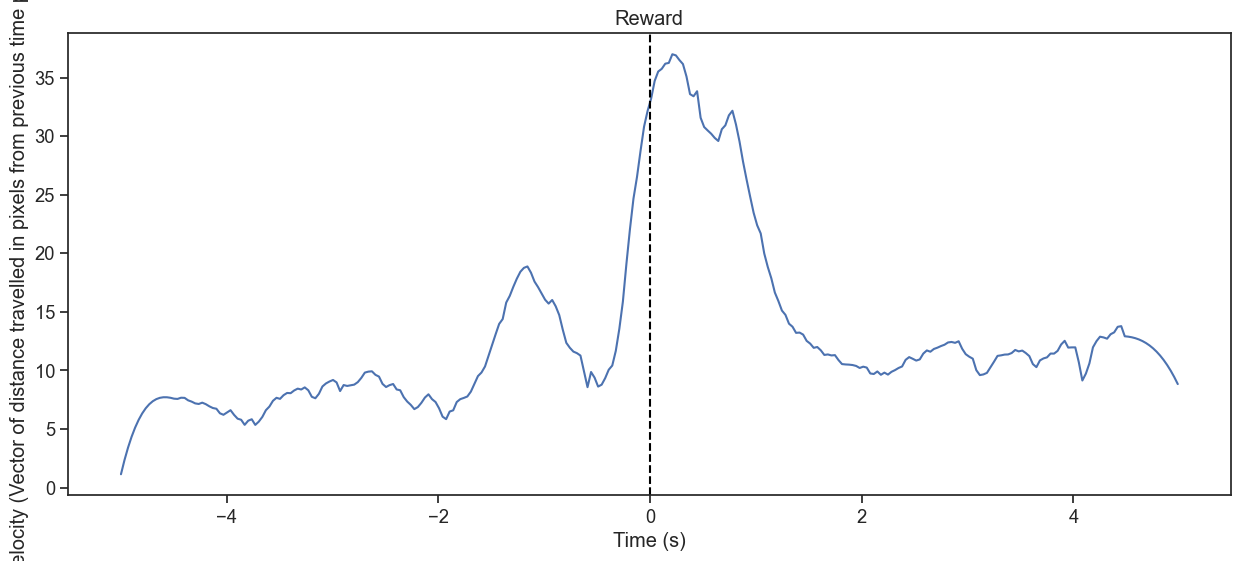

In [612]:
time_seconds = np.arange(-5, 5, 0.0334)
median_array_5s_filtered=savgol_filter(median_array_5s,31,3)



plt.plot(time_seconds, median_array_5s_filtered)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (Vector of distance travelled in pixels from previous time point)")
plt.title("Reward")
plt.axvline(x=0, color='black', linestyle='--', label='Vertical Line')

plt.show()

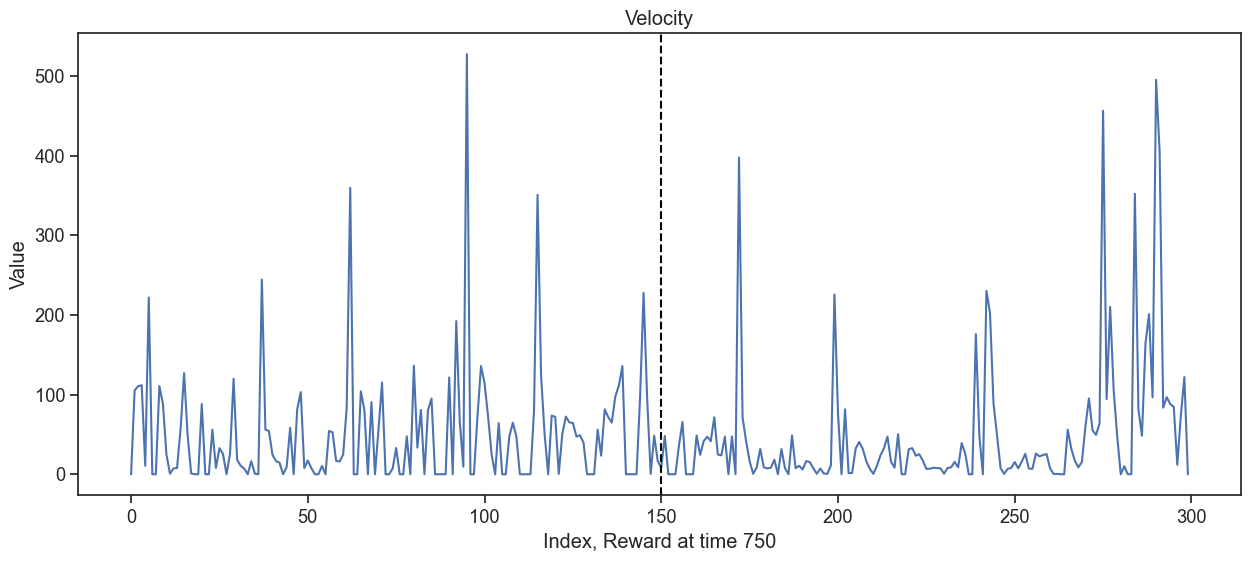

In [613]:
plt.plot(event_arrays_5s[2])
plt.xlabel("Index, Reward at time 750")
plt.ylabel("Value")
plt.title("Velocity")
plt.axvline(x=150, color='black', linestyle='--', label='Vertical Line')

plt.show()

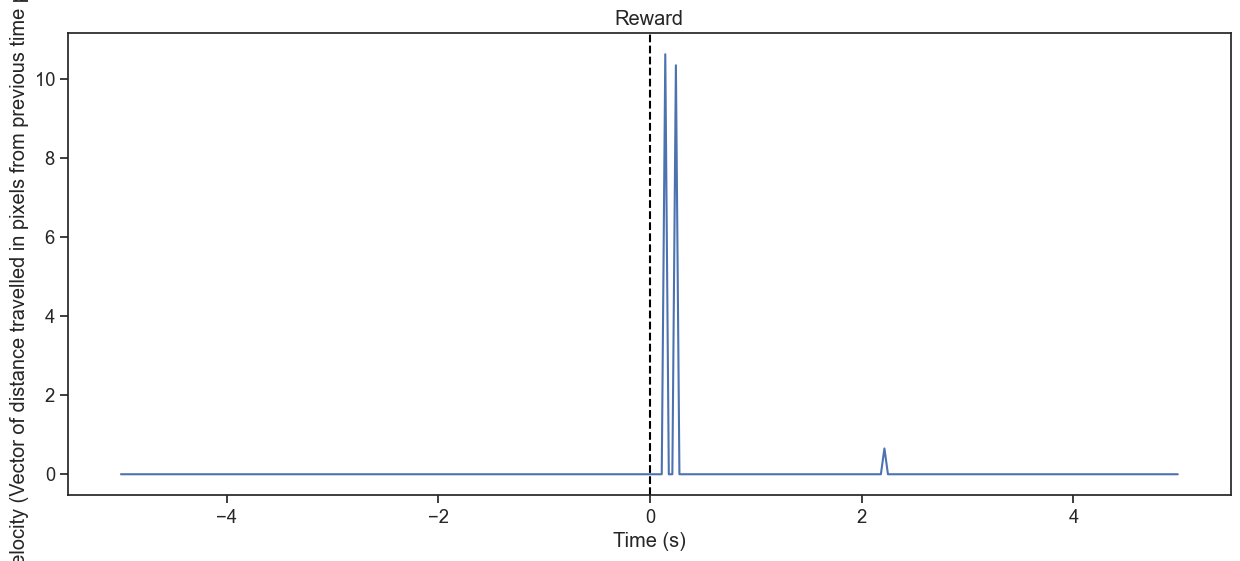

In [603]:
time_seconds = np.arange(-5, 5, 0.0334)

plt.plot(time_seconds,event_arrays_5s_tongue[5])
plt.xlabel("Time (s)")
plt.ylabel("Velocity (Vector of distance travelled in pixels from previous time point)")
plt.title("Reward")
plt.axvline(x=0, color='black', linestyle='--', label='Vertical Line')

plt.show()

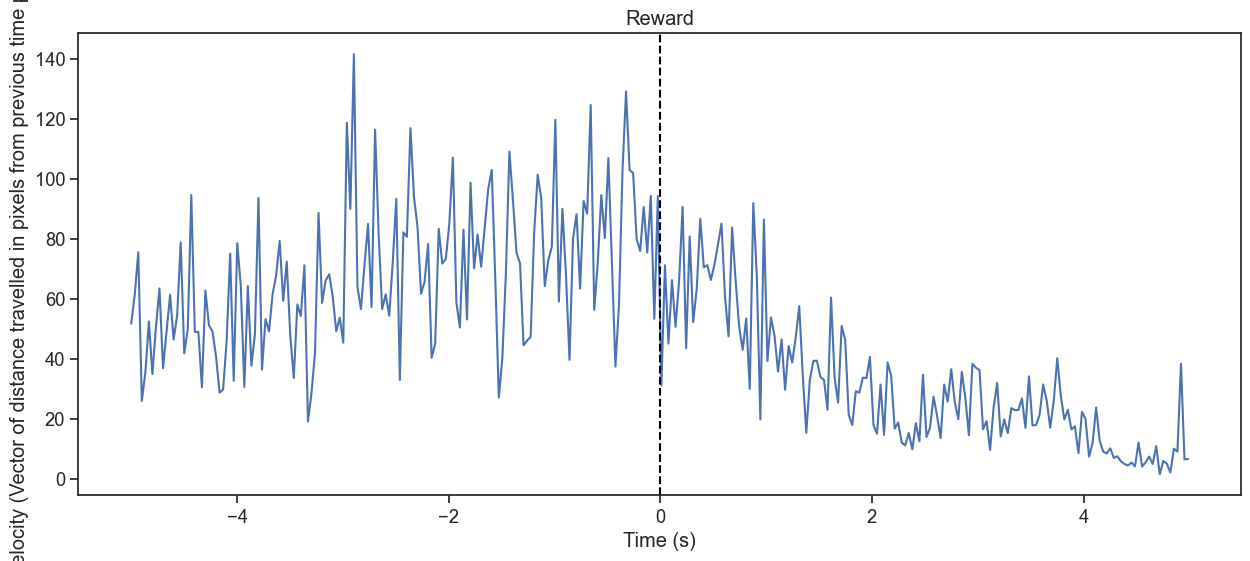

In [604]:
time_seconds = np.arange(-5, 5, 0.0334)

plt.plot(time_seconds, mean_array_5s)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (Vector of distance travelled in pixels from previous time point)")
plt.title("Reward")
plt.axvline(x=0, color='black', linestyle='--', label='Vertical Line')

plt.show()

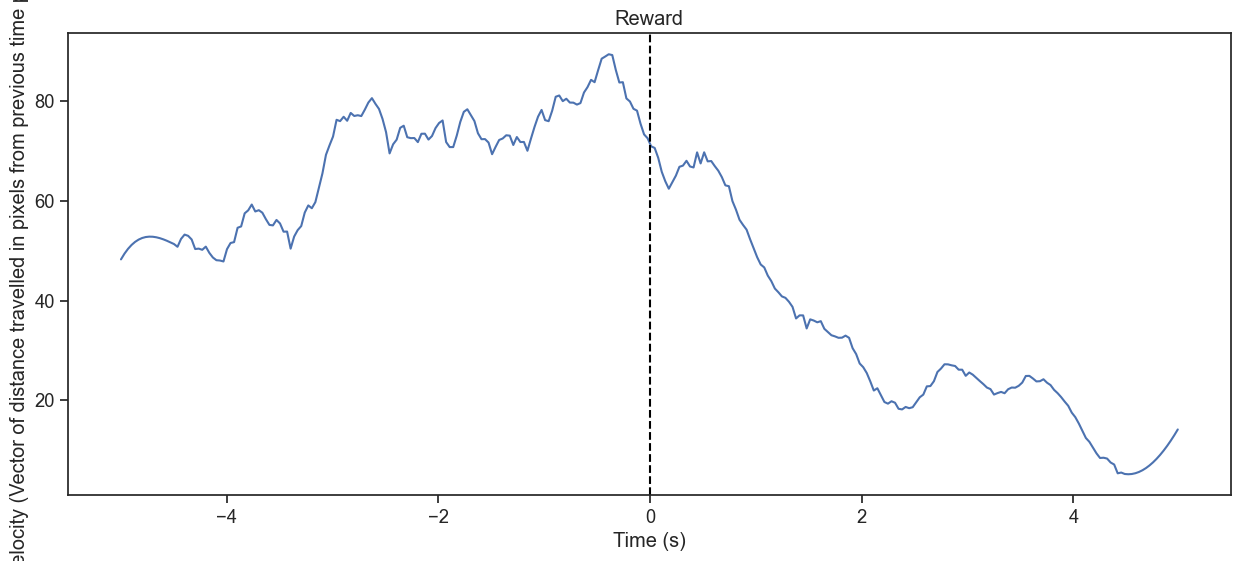

In [605]:
time_seconds = np.arange(-5, 5, 0.0334)
mean_array_5s_filtered=savgol_filter(mean_array_5s,31,3)



plt.plot(time_seconds, mean_array_5s_filtered)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (Vector of distance travelled in pixels from previous time point)")
plt.title("Reward")
plt.axvline(x=0, color='black', linestyle='--', label='Vertical Line')

plt.show()

In [ ]:
import seaborn as sns

In [ ]:
event_arrays_5s_stack=np.stack(event_arrays_5s)
std = np.std(event_arrays_5s_stack, axis=0)

time_seconds = np.arange(-5, 5, 0.0334)

plt.plot(time_seconds, mean_array_5s)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (Vector of distance travelled in pixels from previous time point)")
plt.title("Reward")
plt.axvline(x=0, color='black', linestyle='--', label='Vertical Line')

plt.fill_between(time_seconds, mean_array_5s - std , mean_array_5s + std, alpha=0.2, color='blue')

plt.show()

In [ ]:
event_arrays_5s_conc=np.concatenate(event_arrays_5s)

x_values = np.tile(np.arange(300), 33) 
y_values = event_arrays_5s_conc

plt.scatter(x_values, y_values, marker='.', alpha=0.5)

# Add labels and title
plt.xlabel('Time (reward at 150)')
plt.ylabel('Velocity')
plt.title('Scatter Plot for All Rewards')

# Show the plot
plt.show()

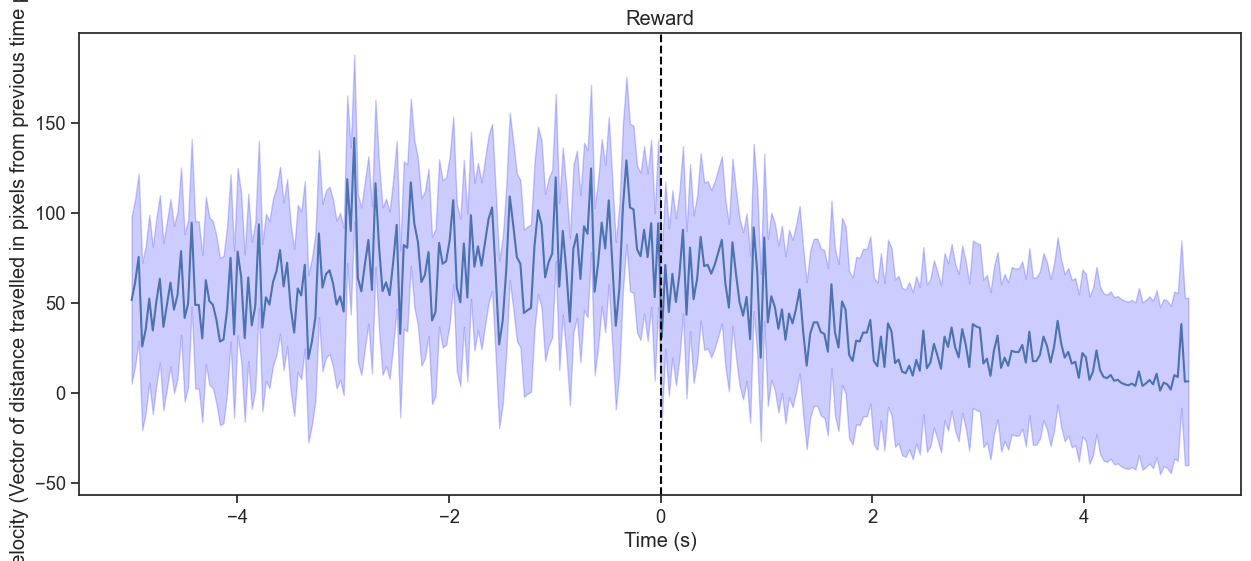

In [591]:
std = np.std(event_arrays_5s_conc, axis=0)

time_seconds = np.arange(-5, 5, 0.0334)

plt.plot(time_seconds, mean_array_5s)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (Vector of distance travelled in pixels from previous time point)")
plt.title("Reward")
plt.axvline(x=0, color='black', linestyle='--', label='Vertical Line')

plt.fill_between(time_seconds, mean_array_5s - std , mean_array_5s + std, alpha=0.2, color='blue')

plt.show()

In [592]:
print(event_arrays_5s_conc.shape)

(17100,)


In [593]:
print(event_arrays_5s_conc)

[ 0.         40.25182616 53.15646561 ...  7.37737786  0.63347474
  0.05410928]


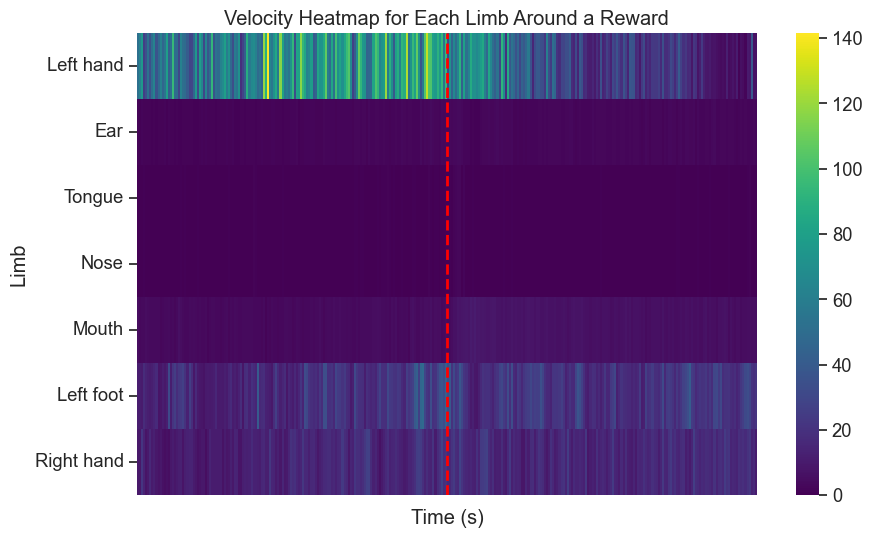

In [594]:
velocities=np.vstack([mean_array_5s, mean_array_5s_ear, mean_array_5s_tongue,mean_array_5s_nose,mean_array_5s_mouth,mean_array_5s_leftfoot,mean_array_5s_righthand])

plt.figure(figsize=(10, 6))
sns.heatmap(velocities, cmap='viridis', xticklabels=False, yticklabels=['Left hand', 'Ear', 'Tongue','Nose', 'Mouth', 'Left foot', 'Right hand'])
plt.axvline(150, color='red', linewidth=2, linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Limb')
plt.title('Velocity Heatmap for Each Limb Around a Reward')
plt.show()



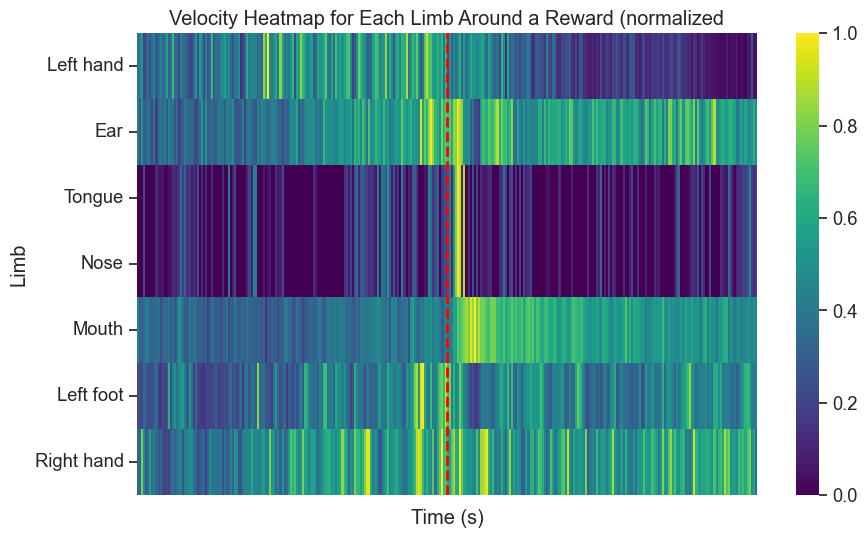

In [550]:
velocities=np.vstack([mean_array_5s_norm, mean_array_5s_ear_norm, mean_array_5s_tongue_norm,mean_array_5s_nose_norm,mean_array_5s_mouth_norm,mean_array_5s_leftfoot_norm,mean_array_5s_righthand_norm])

plt.figure(figsize=(10, 6))
sns.heatmap(velocities, cmap='viridis', xticklabels=False, yticklabels=['Left hand', 'Ear', 'Tongue','Nose', 'Mouth', 'Left foot', 'Right hand'])
plt.axvline(150, color='red', linewidth=2, linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Limb')
plt.title('Velocity Heatmap for Each Limb Around a Reward (normalized')
plt.show()


In [ ]:
print(mean_array_5s)

In [ ]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(211)
ax1.plot(lefthand_loc[:, 0, 0], 'k', label='x')
ax1.plot(-1*lefthand_loc[:, 1, 0], 'k', label='y')
ax1.legend()
ax1.set_xticks([])
ax1.set_title('Thorax')

ax2 = fig.add_subplot(212, sharex=ax1)
ax2.imshow(velocity[:,np.newaxis].T, aspect='auto', vmin=0, vmax=5)
ax2.set_yticks([])
ax2.set_title('Velocity')

In [ ]:
array_2d = np.vstack(event_arrays)
plt.imshow(array_2d, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xlabel("Time,index 750=reward")
plt.ylabel("Reward number")
plt.title("Heatmap of velocity")
plt.axvline(x=750, color='yellow', linestyle='--', label='Vertical Line')
plt.show()

In [58]:
print(array_2d.size)

49500


In [59]:
print(rewards.shape)

(90000,)


In [60]:
reward_time=np.column_stack((ttl_times,rewards))
print(reward_time)
np.count_nonzero(rewards)

[[  32.8792659    0.       ]
 [  32.9132542    0.       ]
 [  32.9468929    0.       ]
 ...
 [3034.2957623    0.       ]
 [3034.3284802    0.       ]
 [3034.3622841    0.       ]]


2340

In [61]:
condition=np.isin(ttl_times, vid_times)
print(condition)



[ True False False ... False False False]


In [62]:
np.count_nonzero(condition)

1

In [63]:
result = np.column_stack((reward_time, new_column))
print(result)

NameError: name 'new_column' is not defined

In [64]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt

In [65]:
d = np.load(r'D:\train_SLEAP_simple\testalign\DON-011733\20230305\data\results.npz', allow_pickle=True)
rot1 = d['rotary_encoder1_abstime']
rot2 = d['rotary_encoder2_abstime']
abstimes = d['abs_times_ttl_read']
print (rot1.shape, rot2.shape, abstimes.shape)
plt.figure()
plt.plot(rot1)
plt.show()
print(rot1[1:10])

(3008217, 1) (3008217, 1) (3008217,)
[[5.12648455]
 [5.1256748 ]
 [5.11903479]
 [5.11223283]
 [5.10721234]
 [5.10769819]
 [5.11628161]
 [5.11660552]
 [5.11709137]]


In [66]:
def binarize(data):
    
    data_bin = data.copy()
    
    idx = np.where(data<2.5)[0]
    idx2 = np.where(data>=2.5)[0]
    
    data_bin[idx] = 0
    data_bin[idx2] = 1
    
    #
    return data_bin
#
def get_velocity(rot1, rot2):
    
    # distance
    n_clicks_per_rotation = 500    
    ball_diameter = 0.2  # distance in meters
    ball_circumference = ball_diameter*3.141592
    dist_per_click = ball_circumference/n_clicks_per_rotation
    
    # time
    sample_rate = 1000
    seconds_per_time_stamp = 1/sample_rate
        
    #
    bin1 = binarize(rot1)
    bin2 = binarize(rot2)
    
    plt.figure()
    plt.plot(bin1)
    #plt.plot(bin2)
    plt.show()
    
    #
    clicks = np.array((bin1, bin2)).T.squeeze()
    print ("clicks: ", clicks.shape)
        
    #
    vel = []
    times = []
    last_click_location = 0
    time_since_last_click = 0
    rot1_last_state = clicks[0,0]
    rot2_state = clicks[0,1]
    for k in range(0,clicks.shape[0],1):
        
        #
        if clicks[k,0]!=rot1_last_state:
           # print (k, "click: ")
            distance = dist_per_click  #only walked 1 click
            time = time_since_last_click*seconds_per_time_stamp
            
            # 
            v = distance/time 
            
            #
            vel.append(v)
            times.append(k/sample_rate)       
            
            #
            time_since_last_click=0
            last_click_location=k #.copy()
            rot1_last_state=clicks[k,0]
        else:
            vel.append(0)
            times.append(k/sample_rate)       
        #    
        time_since_last_click+=1
    #
    return np.array(vel), np.array(times)
    

In [67]:
binarize(rot1)
binarize(rot2)
vel, times = get_velocity(rot1,rot2)

clicks:  (3008217, 2)


In [68]:
print(vel)

plt.figure()
plt.plot(vel)
#plt.plot(r1)
plt.show()

[0. 0. 0. ... 0. 0. 0.]


In [69]:
def binarize(data):
    
    data_bin = data.copy()
    
    idx = np.where(data<2.5)[0]
    idx2 = np.where(data>=2.5)[0]
    
    data_bin[idx] = 0
    data_bin[idx2] = 1
    
    #
    return data_bin
#
def get_velocity2(rot1, rot2):
    
    # distance
    n_clicks_per_rotation = 500    
    ball_diameter = 0.2  # distance in meters
    ball_circumference = ball_diameter*3.141592
    dist_per_click = ball_circumference/n_clicks_per_rotation
    
    # time
    sample_rate = 1000
    seconds_per_time_stamp = 1/sample_rate
        
    #
    bin1 = binarize(rot1)
    bin2 = binarize(rot2)
    
    plt.figure()
    plt.plot(bin2)
    #plt.plot(bin2)
    plt.show()
    
    #
    clicks = np.array((bin1, bin2)).T.squeeze()
    print ("clicks: ", clicks.shape)
        
    #
    vel2 = []
    times2 = []
    last_click_location = 0
    time_since_last_click = 0
    rot1_last_state = clicks[0,0]
    rot2_last_state = clicks[0,1]
    for k in range(0,clicks.shape[0],1):
        
        #
        if clicks[k,1]!=rot2_last_state:
           # print (k, "click: ")
            distance = dist_per_click  #only walked 1 click
            time = time_since_last_click*seconds_per_time_stamp
            
            # 
            v = distance/time 
            
            #
            vel2.append(v)
            times2.append(k/sample_rate)       
            
            #
            time_since_last_click=0
            last_click_location=k #.copy()
            rot2_last_state=clicks[k,1]
        else:
            vel2.append(0)
            times2.append(k/sample_rate)       
        #    
        time_since_last_click+=1
    #
    return np.array(vel2), np.array(times2)




    

In [70]:
binarize(rot1)
binarize(rot2)
vel2, times2 = get_velocity2(rot1,rot2)
vel, times = get_velocity(rot1,rot2)

print(vel2.shape)

plt.figure()
plt.plot(vel2)
#plt.plot(r1)
plt.show()



print(vel.shape)

plt.figure()
plt.plot(vel)
#plt.plot(r1)
plt.show()

clicks:  (3008217, 2)
clicks:  (3008217, 2)
(3008217,)
(3008217,)


In [152]:
num_bins = 3008217//33
bin_size = len(vel) // num_bins
binned_array = vel[:num_bins * bin_size].reshape(-1, bin_size)
print(binned_array.shape)

(91158, 33)


In [153]:
print(90000)

90000


In [154]:
print(binned_array[0,:])
print(binned_array[89998,:])

print(vel[0:33])
print(vel[(3008217-66):(3008217-33)])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05463638
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05463638
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [155]:
vel_bin = np.mean(binned_array, axis=1)
plt.figure()
plt.plot(vel_bin)
#plt.plot(r1)
plt.show()

In [112]:
import numpy as np
from scipy.signal import savgol_filter

vel_bin_smooth=savgol_filter(vel_bin,301,3)
plt.figure()
plt.plot(vel_bin_smooth)
#plt.plot(r1)
plt.show()

In [75]:
def moving_average_convolve(data, window_size):
    window = np.ones(window_size) / window_size
    moving_averages = np.convolve(data, window, mode='valid')
    return moving_averages

# Example usage
data_array = vel_bin  # Your 9000-long array here
window_size = 30

moving_averages = moving_average_convolve(data_array, window_size)

plt.figure()
plt.plot(moving_averages)
#plt.plot(r1)
plt.show()

In [113]:
event_arrays_5s_wheel = []

for i in reward_indices:
    lower_bound = i - 150
    upper_bound = i + 150
    event_array = vel_bin[lower_bound:upper_bound]
    event_arrays_5s_wheel.append(event_array)
    

event_arrays_5s_wheel=np.nan_to_num(event_arrays_5s_wheel, nan=0) 


In [114]:
mean_array_5s_wheel = np.mean(event_arrays_5s_wheel, axis=0)


In [151]:
time_seconds = np.arange(-5, 5, 0.0334)

plt.plot(time_seconds, mean_array_5s_wheel)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (Vector of distance travelled in pixels from previous time point)")
plt.title("Reward")
plt.axvline(x=0, color='black', linestyle='--', label='Vertical Line')

plt.show()

ValueError: x and y must have same first dimension, but have shapes (300,) and (1200,)

In [150]:
time_seconds = np.arange(-5, 5, 0.0334)
mean_array_5s_filtered_wheel=savgol_filter(mean_array_5s_wheel,11,5)



plt.plot(time_seconds, mean_array_5s_filtered_wheel)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (Vector of distance travelled in pixels from previous time point)")
plt.title("Reward")
plt.axvline(x=0, color='black', linestyle='--', label='Vertical Line')

plt.show()

ValueError: x and y must have same first dimension, but have shapes (300,) and (1200,)

In [118]:
print(mean_array_5s_wheel.shape)

(300,)


In [81]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Example usage

window_size = 5

moving_averages = moving_average(mean_array_5s_filtered_wheel, window_size)

In [149]:
binned_array_times = abstimes[:num_bins * bin_size].reshape(-1, bin_size)
print(binned_array_times.shape)

time_bin = np.mean(binned_array_times, axis=1)
plt.figure()
plt.plot(time_bin)
#plt.plot(r1)
plt.show()

print(time_bin[89990:90000])


(91158, 33)
[2995.83204219 2995.86581934 2995.89869102 2995.93163066 2995.96467317
 2995.99750692 2996.03034931 2996.06331409 2996.09617287 2996.12914005]


In [120]:
#Try to know at what times does the first ttl pulse happen

import numpy as np

def load_ttl_and_video_times_absolute(fname_results,
                                      fname_video):
    d = np.load(fname_results, allow_pickle=True)
    
    ttl_times = d['ttl_times']
    vid = np.load(fname_video, allow_pickle=True)
    vid_times = vid['vide_frame_times']
    #print (vid_times)
    vid_times = vid_times[:,1]
    vid_times = vid_times - vid_times[0]+ttl_times[0]
    print ("#ttl times: ", ttl_times.shape)
    print ("#Video times: ", vid_times.shape)
    return ttl_times, vid_times
#
fname_results = r"D:\train_SLEAP_simple\testalign\DON-011733\20230305\data\results.npz"
fname_video = r"D:\train_SLEAP_simple/testalign/DON-011733/20230305/data/video_data.npz"
ttl_times, vid_times = load_ttl_and_video_times_absolute(fname_results,
                                                            fname_video)

#ttl times:  (90000,)
#Video times:  (89188,)


In [121]:
print(ttl_times[0:10])

[32.8792659 32.9132542 32.9468929 32.9789344 33.0136353 33.0465762
 33.0786633 33.1125771 33.146332  33.180278 ]


In [122]:
print(ttl_times[89990:90000])

[3034.0630216 3034.0951728 3034.1290511 3034.1627454 3034.1949454
 3034.2289431 3034.2624868 3034.2957623 3034.3284802 3034.3622841]


In [162]:
print(time_bin[90000])

[2995.83204219 2995.86581934 2995.89869102 2995.93163066 2995.96467317
 2995.99750692 2996.03034931 2996.06331409 2996.09617287 2996.12914005]


In [159]:
print(abstimes[0:10])

[28.1992775 28.1994615 28.1996495 28.1998029 28.1999543 28.2001051
 28.2002558 28.200405  28.2005623 28.2007123]


In [170]:
#Loop to create a list of indeces that correspond to the nearest frame time for each TTL pulse time.

indexes = []


for n in range(len(ttl_times)):
    abs_difference=abs(ttl_times[n]-time_bin)
    idx = np.argmin(abs_difference)
    indexes.append(idx)


print(indexes[0:10])

[204, 205, 206, 207, 208, 209, 210, 211, 212, 213]


In [171]:
print(indexes[89990])

91148


In [172]:
print(ttl_times[89990])
print(time_bin[91148])
print(time_bin[91149])

3034.0630216
3034.0468354878785
3034.079611306061


In [126]:
def find_duplicates(lst):
    duplicates = []
    seen = set()
    
    for item in lst:
        if item in seen:
            duplicates.append(item)
        else:
            seen.add(item)
    
    return duplicates

# Example usage

result = find_duplicates(indexes)
print(result)

[678, 681, 1026, 1056, 1344, 1579, 1630, 1726, 2106, 2200, 2269, 2486, 2770, 2866, 2960, 3056, 3143, 3246, 3538, 3541, 3811, 3841, 3910, 4144, 4197, 4199, 4384, 4478, 4949, 5048, 5054, 5056, 5058, 5238, 5357, 5529, 5532, 5660, 5712, 6090, 6280, 6570, 6573, 6660, 6754, 6873, 6944, 7039, 7176, 7415, 7418, 7700, 8082, 8086, 8089, 8091, 8176, 8272, 8366, 8389, 8692, 8746, 9123, 9126, 9220, 9314, 9407, 9410, 9504, 9602, 9605, 9694, 9905, 10208, 10511, 10832, 11118, 11120, 11122, 11421, 11724, 11860, 12066, 12350, 12537, 12636, 12937, 13240, 13309, 13867, 14344, 14453, 14457, 14756, 15059, 15104, 15113, 15115, 15294, 15385, 15388, 15578, 15861, 15958, 15969, 15971, 15973, 16272, 16575, 17002, 17382, 17478, 17485, 17489, 17668, 17788, 18091, 18238, 18428, 18524, 18618, 18808, 19001, 19003, 19094, 19188, 19192, 19194, 19203, 19304, 19308, 19607, 19664, 19854, 20041, 20140, 20330, 20804, 20820, 21123, 21186, 21376, 21426, 21753, 22136, 22326, 22336, 22340, 22419, 22422, 22639, 22708, 22942, 237

In [127]:
vel_rot=[vel_bin_smooth[i] for i in indexes]

In [128]:
print(vel_rot[0:10])
print(vel_rot[89990:90000])

[0.05101596120236601, 0.05124025696162623, 0.05136072812119843, 0.051151142289206544, 0.05089174256814826, 0.05087016787069176, 0.05094173003994131, 0.051008521116407156, 0.051171618510035446, 0.0512744607601849]
[0.043033161426885944, 0.046423404901543994, 0.053433544728445984, 0.0570545657678317, 0.06075363734926738, 0.0645313218163233, 0.06838818151257096, 0.07232477878158013, 0.0763416759669218, 0.0763416759669218]


In [129]:
plt.plot(vel_rot)

In [174]:
event_arrays_5s_wheel = []

for i in reward_indices:
    lower_bound = i - 150
    upper_bound = i + 150
    event_array = vel_rot[lower_bound:upper_bound]
    event_arrays_5s_wheel.append(event_array)
    

event_arrays_5s_wheel=np.nan_to_num(event_arrays_5s_wheel, nan=0) 


In [175]:
mean_array_5s_wheel = np.mean(event_arrays_5s_wheel, axis=0)

In [176]:
time_seconds = np.arange(-5, 5, 0.0334)

plt.plot(time_seconds, mean_array_5s_wheel)
plt.xlabel("Time (s)")
plt.ylabel("Velocity")
plt.title("Reward")
plt.axvline(x=0, color='black', linestyle='--', label='Vertical Line')

plt.show()

In [180]:




plt.scatter(vel_rot, velocity)

# Add labels and title
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot of X and Y Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
